
# COVID-19 Literature Analysis

In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 63,000 scholarly articles, including over 51,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in new coronavirus literature, making it difficult for the medical research community to keep up.

kaggle Link: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

Dataset Link (CORD-19): https://www.semanticscholar.org/cord19/download

## Importing Files

In [ ]:
import os
import time
import json
import pickle
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('averaged_perceptron_tagger')

## Pre-Process Data

In [2]:
DATA_PATH = os.path.join("..", "Data", "document_parses", "*", "*.json")

In [3]:
if not os.path.exists(os.path.join(os.path.join("..", "Outputs"))):
    os.makedirs(os.path.join(os.path.join("..", "Outputs", "Papers")))
    open(os.path.join("..", "Outputs", "progressFile.txt"), "w").close()
    keywordsFile=open(os.path.join("..", "Outputs", "keywords.csv"), "w")
    keywordsFile.write("Paper ID, Paper Title, Keywords\n")
    keywordsFile.close()

In [4]:
def preprocessString(text):
    filterTags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']

    tags = pos_tag(word_tokenize(text))
    tags = [tok for tok, tag in tags if tag in filterTags]    
    return " ".join(list(set(tags)))

In [5]:
keywords=[]
alreadyProcessedFiles=[]
data={}
i=0

with open(os.path.join("..", "Outputs", "data.pickle"), 'rb') as pickleFile:
    data=pickle.load(pickleFile)
    print(len(data))

for filename in glob(DATA_PATH):    
    progressFile=open(os.path.join("..", "Outputs", "progressFile.txt"), "r")
    alreadyProcessedFiles=progressFile.readlines()
    alreadyProcessedFiles=[x[:-1] for x in alreadyProcessedFiles]
    progressFile.close()
    
    if (filename.split("\\")[-2]+ "," +filename.split("\\")[-1]) in alreadyProcessedFiles:
        print(filename, "continue")
        continue
        
    file=open(filename, "r")
    jsonFileData = json.load(file)
    
    paperTitle=jsonFileData["metadata"]["title"].encode("ascii", "ignore")
    paperID=jsonFileData["paper_id"]
    abstract=jsonFileData["abstract"]
    bodyText=jsonFileData["body_text"]
    
    i=len(alreadyProcessedFiles)
    
    print(i, "Paper Name:", paperTitle.decode())
    i+=1
    
    keywordsInThePaper=[]
    
    for abstractElement in abstract:
        abstractData=abstractElement["text"].lower()
        if abstractData.find("keywords") != -1:
            abstractData=abstractData.replace("keywords: ", "")
            abstractData=abstractData.replace("keywords", "")
            keywordsInThePaper=", ".join(abstractData.split(", ")).encode("ascii", "ignore")
            
            keywordsFile = open(os.path.join("..", "Outputs", "keywords.csv"), "a")
            keywordsFile.write(paperID + "," + paperTitle.decode() + "," + "\"" + keywordsInThePaper.decode() + "\"\n")
            keywordsFile.close()
            
            keywords.append(abstractData.split(", "))

    abstract = "".join([text["text"] + "\n" for text in abstract])
    bodyText = "".join([text["section"] + "\n" + text["text"] + "\n" for text in bodyText])
    
    abstract=preprocessString(abstract)
    bodyText=preprocessString(bodyText)
    
    document=abstract+bodyText
    data[paperID]=document
    
    with open(os.path.join("..", "Outputs", "data.pickle"), 'wb') as pickleFile:
        pickle.dump(data, pickleFile)
    
    paper=open(os.path.join("..", "Outputs", "Papers", paperID + ".txt"), "w")
    paper.write(", ".join(abstract).encode("ascii", "ignore").decode() + "\n\n" + ", ".join(bodyText).encode("ascii", "ignore").decode())
    paper.close()
    
#     print("Abstract", abstract)
#     print("\nBody", bodyText)

    file.close()
    alreadyProcessedFiles.append(filename)
    
    progressFile=open(os.path.join("..", "Outputs", "progressFile.txt"), "a")
    progressFile.write(filename.split("\\")[-2]+ "," +filename.split("\\")[-1]+"\n")
    progressFile.close()

14556
..\Data\document_parses\pdf_json\0001418189999fea7f7cbe3e82703d71c85a6fe5.json continue
..\Data\document_parses\pdf_json\00016663c74157a66b4d509d5c4edffd5391bbe0.json continue
..\Data\document_parses\pdf_json\00039b94e6cb7609ecbddee1755314bcfeb77faa.json continue
..\Data\document_parses\pdf_json\0005d253951fedc237715a37db147032eea28912.json continue
..\Data\document_parses\pdf_json\00060fb61742ff60e4e3ba4648c74a34cfe9560d.json continue
..\Data\document_parses\pdf_json\00073cb65dd2596249230fab8b15a71c4a135895.json continue
..\Data\document_parses\pdf_json\00075c64ada4d1530d1fee02294a8201450f280d.json continue
..\Data\document_parses\pdf_json\000affa746a03f1fe4e3b3ef1a62fdfa9b9ac52a.json continue
..\Data\document_parses\pdf_json\000b7d1517ceebb34e1e3e817695b6de03e2fa78.json continue
..\Data\document_parses\pdf_json\000bc3d4637530496ac4cb798e10d95709eff92d.json continue
..\Data\document_parses\pdf_json\000e754142ba65ef77c6fdffcbcbe824e141ea7b.json continue
..\Data\document_parses\pd

..\Data\document_parses\pdf_json\007261b506c7d2954ca49a97767ccaf4988d7893.json continue
..\Data\document_parses\pdf_json\007509fe0a55a220464059708983124530cbf05b.json continue
..\Data\document_parses\pdf_json\007618ad76a3548195ab5d11c1e2459931c91cd1.json continue
..\Data\document_parses\pdf_json\007909ae8397e78e90e4563ac0b05d77138a6e97.json continue
..\Data\document_parses\pdf_json\0079559ab8717d83bc3df6be8533ff9672bb4367.json continue
..\Data\document_parses\pdf_json\00799d9acb7f964564fd4c31d0e6268185e68e3c.json continue
..\Data\document_parses\pdf_json\007a59ca5fcd04a5abfcbcf037e688320788ea08.json continue
..\Data\document_parses\pdf_json\007b0718b7fa24d93de07dcab13fe5245faa9862.json continue
..\Data\document_parses\pdf_json\007bf75961da42a7e0cc8e2855e5c208a5ec65c1.json continue
..\Data\document_parses\pdf_json\007d75e45cc9d79a93133918808dc9e86476b8ca.json continue
..\Data\document_parses\pdf_json\007da294df205b0188f2b50b347def276bf90adb.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0103f034e19e62a00514529f0eb6e524abbb00b2.json continue
..\Data\document_parses\pdf_json\01041a0055287681d22358a256554d8dfa708654.json continue
..\Data\document_parses\pdf_json\0104f6ceccf92ae8567a0102f89cbb976969a774.json continue
..\Data\document_parses\pdf_json\010714b4e2bfc5dbdd80566ee78ab8e366e6d441.json continue
..\Data\document_parses\pdf_json\0109d1273b2d59a099ab66cdad6939d5e7fcb2e8.json continue
..\Data\document_parses\pdf_json\010ad052b58172981e089bc73b9ad16a732960f2.json continue
..\Data\document_parses\pdf_json\010d30977c8c0c6f3df095673df86576dddf64ae.json continue
..\Data\document_parses\pdf_json\010e142c05d608d411e47b8509040e6e207e8dba.json continue
..\Data\document_parses\pdf_json\010e4485b14ced466c18111dcb99d1a40bee882e.json continue
..\Data\document_parses\pdf_json\0110275ca0d02bc34fdda42fa1a9810dd11cd962.json continue
..\Data\document_parses\pdf_json\0110eaeb5103ac1d44cc2e7aa0f6c0f621e6acc7.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0187705c2a09525d5cb71ec594b82e668255fcaf.json continue
..\Data\document_parses\pdf_json\01880ef487dfed3681dd6d296a0a82417b8f38a0.json continue
..\Data\document_parses\pdf_json\0188231fdedeb6be9c033cb5a8a78ff537ccaaa3.json continue
..\Data\document_parses\pdf_json\0188acc1eba8c0a3adef55aeada7de552cf855be.json continue
..\Data\document_parses\pdf_json\018a299cbdcbebd6f4c2584376941907fe7d3aaf.json continue
..\Data\document_parses\pdf_json\018b5b5f732e955d349e14a83481739502ae104c.json continue
..\Data\document_parses\pdf_json\018b618ea132d47ffb43b003a6c78cb9eeadc017.json continue
..\Data\document_parses\pdf_json\018d93800f6eebb4dc6243e585a30e56fbb8d4d9.json continue
..\Data\document_parses\pdf_json\018fb5e62fbbcae07d57d94d29ac630dcc4dccf9.json continue
..\Data\document_parses\pdf_json\01965df9aa58f6c4b31874e8dbb95793c592bf2d.json continue
..\Data\document_parses\pdf_json\0196c5017790a53d56c7dff598dca3db550b7698.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\021aa59c28ff346dcdd67e70d20b4dc2af4bc3c9.json continue
..\Data\document_parses\pdf_json\021af77daa9633d212e816cdbaf9f89240bfa3a0.json continue
..\Data\document_parses\pdf_json\021be4c280d043e92a4a3e03d07d7a684bfac12f.json continue
..\Data\document_parses\pdf_json\021c6cee4475973338022c029affed87f706de5a.json continue
..\Data\document_parses\pdf_json\021fb295411639f5c1bf0ffdaef4024878becd0a.json continue
..\Data\document_parses\pdf_json\021fb425e5590a5735e7b0082fc1d7be8dab9ea5.json continue
..\Data\document_parses\pdf_json\021fba0f252408868fa29b65686dedb3b3d6bf02.json continue
..\Data\document_parses\pdf_json\02201e4601ab0eb70b6c26480cf2bfeae2625193.json continue
..\Data\document_parses\pdf_json\02206b0c97058d5723e4a7a65d0654229834cbf9.json continue
..\Data\document_parses\pdf_json\0220c1ea78acf08466bf84f08ab1dd30d271e091.json continue
..\Data\document_parses\pdf_json\022178536fe8387bb2cd82e1bac99aa5224898c9.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\02766b20eeb39ff051a2f110def2e4bf8b9b010b.json continue
..\Data\document_parses\pdf_json\02783b0989ab6a54fd4af139d787b69b9d9d009e.json continue
..\Data\document_parses\pdf_json\027e6d8e47d81ff2d2d95e58ae81d90118d8065b.json continue
..\Data\document_parses\pdf_json\027e736af0f7c4ad8c9a5422ff628c6bd0f1e508.json continue
..\Data\document_parses\pdf_json\027f86c44365e0ba6a6c26e24134c4c3e98a72ef.json continue
..\Data\document_parses\pdf_json\0280191838881dab3b360cd7e443b26180a6d60a.json continue
..\Data\document_parses\pdf_json\02814b904eab70cea57908bc69e90b074a93852b.json continue
..\Data\document_parses\pdf_json\0282f0f5f2e1c6aace6aa63e389ed4339c00d0b0.json continue
..\Data\document_parses\pdf_json\0283481e4ea4ac671a58c507fd35b7f7646ed071.json continue
..\Data\document_parses\pdf_json\028382edbe67a35f1e099fa0607fa9a4922a45d1.json continue
..\Data\document_parses\pdf_json\02843e9be924677d6541e0221a26501ce2111aaa.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\031fb114a068c900631395c7be12bfb7655cacfb.json continue
..\Data\document_parses\pdf_json\031fd47b33af0e00eeb5e76c0d010df92df6bef6.json continue
..\Data\document_parses\pdf_json\03203ab50eb64271a9e825f94a1b1a6c46ea14b3.json continue
..\Data\document_parses\pdf_json\032207023bce7ab4550c38283ac7e2964d3c6561.json continue
..\Data\document_parses\pdf_json\0322eccb9230a1aad165702457091eb9ae122d55.json continue
..\Data\document_parses\pdf_json\0323afdd46345d79d9767ab1f7b13d0e2a4a3bb2.json continue
..\Data\document_parses\pdf_json\0326bf875d2a22d7c4a4328dcd34c2d801fd110e.json continue
..\Data\document_parses\pdf_json\03270a6137f68975bf6a35bc5503ca367d97d2fc.json continue
..\Data\document_parses\pdf_json\0328d76c782e70da7bdb624d0dab8a5360d9f4f9.json continue
..\Data\document_parses\pdf_json\032aa71cd58ababaf6e874f5bf58526541aa797f.json continue
..\Data\document_parses\pdf_json\032c89b19abb3b5b9a6f3a882ae5e5f85ce9ed2c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\03a061bbd85ef6aca2b2087a80ff2581eb24a8fc.json continue
..\Data\document_parses\pdf_json\03a158fb5fcbfccd841b4a9638e840a0302b9459.json continue
..\Data\document_parses\pdf_json\03a2f9a8c86cde90a603a64a608290d98fed9aa0.json continue
..\Data\document_parses\pdf_json\03a35a5db9430f459364eb7c4fa5029551a00436.json continue
..\Data\document_parses\pdf_json\03a4726ffcfe2c3a4653decb4000ae5ecf69fe90.json continue
..\Data\document_parses\pdf_json\03a9a21fad1427fc2dbb6a4969627d0a76459597.json continue
..\Data\document_parses\pdf_json\03aa0556aa6d712feb40fd557a3c0fd98338beda.json continue
..\Data\document_parses\pdf_json\03ad1cf472c9636fceb1b800c553fde73724e349.json continue
..\Data\document_parses\pdf_json\03ae4b61aa2d9641f38287806612fc16f58d4299.json continue
..\Data\document_parses\pdf_json\03ae58845b4091885dfd1d9ba932e98730d6ced3.json continue
..\Data\document_parses\pdf_json\03ae8ce52539e3309470a7f6cd7ff231d5195512.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\049498aac6e55a04d387da4d744e40d78de23e31.json continue
..\Data\document_parses\pdf_json\04957fabbcd5be43046fff333f701fad7aa5b7c9.json continue
..\Data\document_parses\pdf_json\0499fb7fe4634783a126ec00bf2e50ab43cde015.json continue
..\Data\document_parses\pdf_json\049a3686399336c189e23f0b0ea953097f19f482.json continue
..\Data\document_parses\pdf_json\049d68aa5279d807e4125c33a3d563f6df987cb4.json continue
..\Data\document_parses\pdf_json\049ea432acc08b04a3e21c390f62be3d845a2e2c.json continue
..\Data\document_parses\pdf_json\049ea8899e4cd0666b0098adac0fe9d50bf669a4.json continue
..\Data\document_parses\pdf_json\049f4d86a34470e58428125d84dd1beda53ef358.json continue
..\Data\document_parses\pdf_json\04a02b2f24ba9cf14a860a98b25f65ef2afd73fd.json continue
..\Data\document_parses\pdf_json\04a0ec4b6cb5eeb0d2cbf2c8ea8829b5c476b1b9.json continue
..\Data\document_parses\pdf_json\04a253fd34bd82b3cf7868fca967469c66e392ab.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\050f2a4720d59b24bf7994fe63401b86fa4f3a1f.json continue
..\Data\document_parses\pdf_json\0510c55f6576990353c7b068c09f6a8d99485f0b.json continue
..\Data\document_parses\pdf_json\0511ed1c3e91902ab662c81f8fc20c83a840e8d0.json continue
..\Data\document_parses\pdf_json\0512b8e6e26f790008d3dd7b48b6218b07af1fa1.json continue
..\Data\document_parses\pdf_json\051382aee4c0ba273ffcecaa0ec1b3bf28a3c3a7.json continue
..\Data\document_parses\pdf_json\05138e66d62e0ae4a19fbd619a9b8ec34133e224.json continue
..\Data\document_parses\pdf_json\05139da1426845fa0d421dfa04e6bf776870bcef.json continue
..\Data\document_parses\pdf_json\05175c253f3716d1f0cc02d6b106a426cadd49d6.json continue
..\Data\document_parses\pdf_json\0518584dc1a78f1a596a6f900906728f47d7c256.json continue
..\Data\document_parses\pdf_json\05185e620fb972e3baf5b2e19c9518c6985821f0.json continue
..\Data\document_parses\pdf_json\05186884eb6aed574507e7f0f9316375ffbc6494.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0586c9a5cbb333e62fb7e18d5239eae3be34d42a.json continue
..\Data\document_parses\pdf_json\05878a5b66cd14f60004347322fafaca570755ad.json continue
..\Data\document_parses\pdf_json\05878d55bac4512eac94e195c115657adea10c15.json continue
..\Data\document_parses\pdf_json\058a7fa8583f1506e75d91810cf5958d8bd3cfb7.json continue
..\Data\document_parses\pdf_json\058b0cc7cecd43d80ed47196cb5376fa10efb58a.json continue
..\Data\document_parses\pdf_json\058b7249ce7acc1c14c989cb2d8db27435f81363.json continue
..\Data\document_parses\pdf_json\058c0fc94ded8fa4e7a302081c3ea738d16a4b1a.json continue
..\Data\document_parses\pdf_json\058c4c27aff3a3d03f16fa7f55f632ffc7592200.json continue
..\Data\document_parses\pdf_json\058d30ebfeaf47300e19f411ba6557a44ca4bdfa.json continue
..\Data\document_parses\pdf_json\058e306088e83c58ee30b43f0e102a45463351fe.json continue
..\Data\document_parses\pdf_json\058e30a76f6370b670ce016db713ad29d34b6f8e.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\05f35dc7cb2959fd68695357a0fd393d3a30df8c.json continue
..\Data\document_parses\pdf_json\05f51821fbd690cb484ef52e147871b04fd88c9d.json continue
..\Data\document_parses\pdf_json\05f9059667bfa1e852a7eb38310ea86ea3399e02.json continue
..\Data\document_parses\pdf_json\05facd7b74a94b710cb960c0688dc4cee58a9e5d.json continue
..\Data\document_parses\pdf_json\05fbb0078e14eea85ecbf6904ecef2380d034a10.json continue
..\Data\document_parses\pdf_json\05fbc9a48ec571d9292767d0ac0e54d318a6eadc.json continue
..\Data\document_parses\pdf_json\05fc8f48129cdd80e0edf6734229c17f53a03076.json continue
..\Data\document_parses\pdf_json\05fcde0b042a42310a19070fae6de9a2a9935e71.json continue
..\Data\document_parses\pdf_json\05fef4a975bb02a917f4cef9ea57a3440769e9fb.json continue
..\Data\document_parses\pdf_json\05ff1ab8b180f6b769360c5409d205337f7660a5.json continue
..\Data\document_parses\pdf_json\060006459122fb0c1d9b1bfdae1505db07293cb3.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\06795e24716acde6e56c25d7845c92a97fa0268c.json continue
..\Data\document_parses\pdf_json\06799f68d32524ceea79fa32c0ff3ed84470d724.json continue
..\Data\document_parses\pdf_json\067b2657c08dacbd77f93ed74374ea245fffa76a.json continue
..\Data\document_parses\pdf_json\067e27c79ebe5ee15b998e8706ffb9ce4f1deb20.json continue
..\Data\document_parses\pdf_json\067e53fab4bdec6e6dd07365d38f7e8b3be9c688.json continue
..\Data\document_parses\pdf_json\0680306d54598a47ae348e4b004d1832f5001746.json continue
..\Data\document_parses\pdf_json\06820e35e3a01b06d6c94fb20c9ebe3fc0f2ba94.json continue
..\Data\document_parses\pdf_json\0683242921e92c47d1cb4cc7c8eb64a2770d972e.json continue
..\Data\document_parses\pdf_json\06837008df793f872a6fb830dfb83c9525edb7c4.json continue
..\Data\document_parses\pdf_json\0683cb93185c06fce0c46bf9a49a9396038fd45f.json continue
..\Data\document_parses\pdf_json\0686210bae04e4294f988d42f2acc8d4c5435945.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\06f3b4d46f6046828e594620d274b3cf850887e4.json continue
..\Data\document_parses\pdf_json\06f438eb0076630b62b2b9a5162d5865540698a3.json continue
..\Data\document_parses\pdf_json\06f6376ee6de72fb600cb82dedece2c151f39d5f.json continue
..\Data\document_parses\pdf_json\06f7c71401f8bee74bd090b2928d262133c02043.json continue
..\Data\document_parses\pdf_json\06f8316b5b1cd5f0737d5ada43c3dd9ebce27a91.json continue
..\Data\document_parses\pdf_json\06fbc27c716e609bfd031f5c9998eb5f5bc9b43a.json continue
..\Data\document_parses\pdf_json\06fbed5cb9d110065b60471b650030f3dd137ac1.json continue
..\Data\document_parses\pdf_json\06fe78ef7a876268c79f9b5f4104710289052114.json continue
..\Data\document_parses\pdf_json\06feefc13f34b0d6ca007bf080b5e4f42f11a692.json continue
..\Data\document_parses\pdf_json\06ff1669b8950f46848ba9a8cab500047a18cfe2.json continue
..\Data\document_parses\pdf_json\0700c01d64e50ef5ae5943328bd734718cf614f4.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\07742c18d104719c2b0cafbb594795cbced62c31.json continue
..\Data\document_parses\pdf_json\077465741790f0c5c5ab05866adc5dbcfcdb2f7c.json continue
..\Data\document_parses\pdf_json\077539042908e69c2785d880fb7ce5f90aa8a861.json continue
..\Data\document_parses\pdf_json\0775644af19e13cb5a4214be4db3f8ad75acd2d4.json continue
..\Data\document_parses\pdf_json\0776048a4cfc1bc12d7b814acb1bb17d9960f9fd.json continue
..\Data\document_parses\pdf_json\077a70059a89059bace1150d779cc911a2229c60.json continue
..\Data\document_parses\pdf_json\077d5a9302762a66842c6bdf13912433954ca723.json continue
..\Data\document_parses\pdf_json\077f6cf481e6da150c3a4269d5d77ef38af47bad.json continue
..\Data\document_parses\pdf_json\077fdedebe982644bd8eb2ad732ec9c1b2cff475.json continue
..\Data\document_parses\pdf_json\078025b470595541bbb492b1aaed90862cdca287.json continue
..\Data\document_parses\pdf_json\07815f7f4d5711d2c737bfc2562bd07bf4644189.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\080d57a332b0d1f0a5b0c27180bf930ef6dd7135.json continue
..\Data\document_parses\pdf_json\080dc87cd2a727db275119cdf923f666fdce3e83.json continue
..\Data\document_parses\pdf_json\080eacec35577780247b7c96d1b3bb9ff948c5d7.json continue
..\Data\document_parses\pdf_json\0815316dd0837045c915a15e58b46c70cfbe189e.json continue
..\Data\document_parses\pdf_json\0816e748c473f9ddf03d7952738025c7bf22ef33.json continue
..\Data\document_parses\pdf_json\08174b668145c88e0e719dac2a03b30fb68f5de5.json continue
..\Data\document_parses\pdf_json\081972ad704ef5e00549f376601debc84be429ab.json continue
..\Data\document_parses\pdf_json\081b825afbb363f2ad10098c464e31dc650debd1.json continue
..\Data\document_parses\pdf_json\081bbec2562282161a643b3f230ac7139a5f5d1e.json continue
..\Data\document_parses\pdf_json\081d5a1558992197707b4d4e70b36dd394d6a977.json continue
..\Data\document_parses\pdf_json\081e284bbd91f250a49b548a6fab12268619ec47.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\08911cdc65e71e6398ca79b46806e6c8b2b730ae.json continue
..\Data\document_parses\pdf_json\0892a219a7caf18088f5e3a331ec01b6912c9188.json continue
..\Data\document_parses\pdf_json\0892e16c218542d3a099d7b10aec24cab4bfce55.json continue
..\Data\document_parses\pdf_json\08935ec8109d6356e843176a946afce672815e96.json continue
..\Data\document_parses\pdf_json\0894964214067d5a15eb736deb8c91506ea6ed18.json continue
..\Data\document_parses\pdf_json\089666387f9ccd7dafedd9e736720e24fe6bbfd5.json continue
..\Data\document_parses\pdf_json\0896ceda205c251524a97c8687cc7a517a2aa68d.json continue
..\Data\document_parses\pdf_json\089729d867c630e0e90958e3225cfae36486f021.json continue
..\Data\document_parses\pdf_json\0899b0f8df5f20c6a46ba1dc7675c85858b59a68.json continue
..\Data\document_parses\pdf_json\0899d745009fa75954f75b381c040aebd927832a.json continue
..\Data\document_parses\pdf_json\089acb4677633e0cf2d35fd728e686c8aa887bc0.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\09035546db4fbc3f5abea55ee7f989fcd5ddb097.json continue
..\Data\document_parses\pdf_json\0904279c3e5be2a2ed0b6b52cbc27c3413159b6b.json continue
..\Data\document_parses\pdf_json\09053d629d391ab830bb0b712d1f97159d6736d7.json continue
..\Data\document_parses\pdf_json\0906e65eb3a6fd9d16d13400143d987d7dd40117.json continue
..\Data\document_parses\pdf_json\09076c8327aa32cdaf9ec5e45354d66bc35d1523.json continue
..\Data\document_parses\pdf_json\090b6c8b3df30bc248221869f673a2d970caa1b9.json continue
..\Data\document_parses\pdf_json\090d3be3ef9a924b03d84dcc6ee6f3cde2753bf8.json continue
..\Data\document_parses\pdf_json\090eef84e2f13a23cd9eb50d9da88fd01909c9fe.json continue
..\Data\document_parses\pdf_json\090ff7650426c242fb4e832e9cf64f67d02eb3ce.json continue
..\Data\document_parses\pdf_json\0910e151cd1fb8d455e54cd4e97f867627f934c8.json continue
..\Data\document_parses\pdf_json\0912c78de271b083438d1e7be51873aa959eca40.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\097b9b4ada3e89942ea196c59226e95da1b7969f.json continue
..\Data\document_parses\pdf_json\097d0393351307300324231a51f9ccf5a097146e.json continue
..\Data\document_parses\pdf_json\097d59e4b6dbf760297b48c5ddbbce9a7dc9aedd.json continue
..\Data\document_parses\pdf_json\097e37d35d2cb3c10be9029383ca4b8e0dd5402d.json continue
..\Data\document_parses\pdf_json\097e78073b154805e74de8245008ee3f91c24af2.json continue
..\Data\document_parses\pdf_json\097faaef716ef7e6fcee71d705b273246d4b0f6f.json continue
..\Data\document_parses\pdf_json\0980c3bcb4bd20477b7fa0e3ffe668d9cf601af8.json continue
..\Data\document_parses\pdf_json\09815b6ac7253723cfe4f4cf62d558b20be6e4aa.json continue
..\Data\document_parses\pdf_json\09820e5105dd18593681a94af6b8153d60f54b5d.json continue
..\Data\document_parses\pdf_json\09828066238548180c0e726b8944f6ab9e69c99b.json continue
..\Data\document_parses\pdf_json\0984bcaf808f2a4bb2d9f32585aa698c283d2e58.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0a015f55b8eeb1ac5ac5dc91bcc04202633d0e4d.json continue
..\Data\document_parses\pdf_json\0a01f5cf1c5cdc2711bcef74315dc54a6e143df0.json continue
..\Data\document_parses\pdf_json\0a037565ead5cb2ee8dbdd7f6a0e381dd4b7ad83.json continue
..\Data\document_parses\pdf_json\0a04d377a83b28dbc0d97c90acd829255796f69c.json continue
..\Data\document_parses\pdf_json\0a0571a18973e6198245c720980385ce77c7a153.json continue
..\Data\document_parses\pdf_json\0a05964a670fcbd2b8639ea7339eb63f1ffb8336.json continue
..\Data\document_parses\pdf_json\0a05a7b95ce42f0b53c86a24842ecc9845a7d023.json continue
..\Data\document_parses\pdf_json\0a08fddd9dcee1b1254a05b49113521bbc423ccd.json continue
..\Data\document_parses\pdf_json\0a094d28ffd685164050dbad0e1426abc73a4e18.json continue
..\Data\document_parses\pdf_json\0a098b3876e799d9b21608e26e80d05aa9ec6475.json continue
..\Data\document_parses\pdf_json\0a0afb5dc02afa81689e0e75afe2f9a21ce09e70.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0a686bf5655cebde0f696dab7ab082d63536ec92.json continue
..\Data\document_parses\pdf_json\0a69e9d5ea277f43e879728a3d974843110dee49.json continue
..\Data\document_parses\pdf_json\0a6b1d04aece4d54892d911e8367d0028ab78ee7.json continue
..\Data\document_parses\pdf_json\0a6ca5779d5e1cfe8161c2e68b08281560c555f0.json continue
..\Data\document_parses\pdf_json\0a6d27149c1fc958d4f6a598cc165a7cb0ee0185.json continue
..\Data\document_parses\pdf_json\0a6d3a2d7197b1d4ac24d24f2f154b5fa583f230.json continue
..\Data\document_parses\pdf_json\0a6e4bc983e7a8eb31e252398f47cdaaf1e605b1.json continue
..\Data\document_parses\pdf_json\0a6e9aa35d1320355bf071879e98aabcacfe2b85.json continue
..\Data\document_parses\pdf_json\0a6ec52257d9a88992564d9c0c83f1bfcf54acc9.json continue
..\Data\document_parses\pdf_json\0a70f6f07fa0124b56a7fa4506e38dbb41c3c443.json continue
..\Data\document_parses\pdf_json\0a7215338acce6375554c57d37318fd522207a20.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0adc2dfd5f26656ce3527dbb5dec379d44d0601e.json continue
..\Data\document_parses\pdf_json\0adc67dd5357d6059c21d54281273e4ffa20f6c4.json continue
..\Data\document_parses\pdf_json\0add910e9efb81f7b906101a7790b812074dc8b3.json continue
..\Data\document_parses\pdf_json\0adf2e22eefb4ea5e395462e2bc6713b43fd320c.json continue
..\Data\document_parses\pdf_json\0adfe2229d1381880f5b4a279cf9f71910123266.json continue
..\Data\document_parses\pdf_json\0ae02f293c03e3e1a2d4582e62c22f2c0c291f48.json continue
..\Data\document_parses\pdf_json\0ae061d5ae636443d92654dff07620915ac2ca03.json continue
..\Data\document_parses\pdf_json\0ae08d570fd266cc5c5e7f7f21b52b068f67a505.json continue
..\Data\document_parses\pdf_json\0ae1cad5b20badf8dcea32e8c80209b8948d1e49.json continue
..\Data\document_parses\pdf_json\0ae2c16a9c21a11fc9077dd26857ef4140f65162.json continue
..\Data\document_parses\pdf_json\0ae348a31cc35a76cf9e0999fa3e5369636ffc31.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0b5edd2e409c245c0934d4e7cb2d04f1c1fe1731.json continue
..\Data\document_parses\pdf_json\0b5f8aa815f121c29d72e06b6fa8f1e1f7baa64c.json continue
..\Data\document_parses\pdf_json\0b5fc9e7961738f048d064340557f653be8c7a86.json continue
..\Data\document_parses\pdf_json\0b5fd3a0c9d3ca32eb1ece95cc74aecbe2aacc8f.json continue
..\Data\document_parses\pdf_json\0b6115f8cf864fcdf87693955438b7a8a14ac135.json continue
..\Data\document_parses\pdf_json\0b627ea5840e5e48709565840313984dc900af8d.json continue
..\Data\document_parses\pdf_json\0b65341c3090421acaac37ec4c93212277be55bb.json continue
..\Data\document_parses\pdf_json\0b66cc4baeaf324c0ec4d133553b21989b0b8c2a.json continue
..\Data\document_parses\pdf_json\0b68696224d4bd26fabe51c2a4f9ad8680ecb97f.json continue
..\Data\document_parses\pdf_json\0b691903cee3f26d6d36351604ed1337d8c12bdb.json continue
..\Data\document_parses\pdf_json\0b6921b527a0ad310a609f0206a32ce91b83e496.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0bdd5261670a9bdb2a9532b05a4378708a58f465.json continue
..\Data\document_parses\pdf_json\0bdd91dba6be193d0720ee8568e46b7728cabc9b.json continue
..\Data\document_parses\pdf_json\0bdf8ce93686ba13580923fa56be52c57da4fcb2.json continue
..\Data\document_parses\pdf_json\0be03c86855bc77a1a148b308b873e0dcf1fffe2.json continue
..\Data\document_parses\pdf_json\0be19bfb83d9eb0a6b6f1c7ce8b75a58d8b1ed6f.json continue
..\Data\document_parses\pdf_json\0be2160c6cfc01fe13a42a9a601103694ce58a5f.json continue
..\Data\document_parses\pdf_json\0be366e262aeb830454dd3a74f7cf0cfe349255f.json continue
..\Data\document_parses\pdf_json\0be465ccdb9e51958946dd6a91ac8fb15e2b2272.json continue
..\Data\document_parses\pdf_json\0be7b06a39aa31b27514a501ebdd477f42b0919a.json continue
..\Data\document_parses\pdf_json\0be8d44cdaf0b7cca9697c33a590770f9d6e7fd0.json continue
..\Data\document_parses\pdf_json\0beba87e3366b16efad5fc85a9fb2be33e63e019.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0c572052701fb6af60dc6a000a524c90f3116670.json continue
..\Data\document_parses\pdf_json\0c589675855cd6a533025c50fb319ecd269c2d0d.json continue
..\Data\document_parses\pdf_json\0c58c5ce46bfa52188d231685cc1c6a440840b85.json continue
..\Data\document_parses\pdf_json\0c58e0eb436a3d0cb4c5acfa41babc03b3dfe825.json continue
..\Data\document_parses\pdf_json\0c5b06ab893bf37a034601033ca2e8f8ffcf07fe.json continue
..\Data\document_parses\pdf_json\0c5c7c0eda4954c87bac8bc496087b963d006796.json continue
..\Data\document_parses\pdf_json\0c5d4c595b4b55bb3a1e0840b78bac81906b365d.json continue
..\Data\document_parses\pdf_json\0c5e2fce08994ea993f7c48eb0ecd9267041bff8.json continue
..\Data\document_parses\pdf_json\0c5fbfd4840c2689fbec7ae1fcd204fbc937b7b1.json continue
..\Data\document_parses\pdf_json\0c607a1e1f43f8cf776b7c15375c3b59a16c40e8.json continue
..\Data\document_parses\pdf_json\0c62653ad31709f6deaf97a216f3bc31d68a9eff.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0cd3094f458d8dd679c9050ef72d401d41162272.json continue
..\Data\document_parses\pdf_json\0cd74f5da199c419e5437d21910c99892245d7ac.json continue
..\Data\document_parses\pdf_json\0cd911d564b693ebedf57fa37c28b8ea5705c174.json continue
..\Data\document_parses\pdf_json\0cd96fd42139b22b63e5752eda2c38990a18763a.json continue
..\Data\document_parses\pdf_json\0cd9ee946fc48b03fc5272dc194f4e9fe52ab957.json continue
..\Data\document_parses\pdf_json\0cda048d50c1e093a9c5c6f126836a7e12a14eb7.json continue
..\Data\document_parses\pdf_json\0cdcb4b8bd9b86aeeccf28dfa1d5bfc4412d4083.json continue
..\Data\document_parses\pdf_json\0cdcb926902d1878a7c8a48bfdb2d9c77ec5be02.json continue
..\Data\document_parses\pdf_json\0ce0b8bb68417974932e98c094ec93fbefc5193b.json continue
..\Data\document_parses\pdf_json\0ce0cdb58874840200e8b61c6f70d07409cd342f.json continue
..\Data\document_parses\pdf_json\0ce1f213337247a67628f95cf699bdabddc94d9c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0d4a35d668a5b651ed34f13cc02525e6aee26634.json continue
..\Data\document_parses\pdf_json\0d4ac9a3901d402ac364ae432405f3df2827100f.json continue
..\Data\document_parses\pdf_json\0d4c05088967b8a9d3c0dc977d21d05552d9b2e5.json continue
..\Data\document_parses\pdf_json\0d4ee349986bc6f256d5002e6e86b2830b35fb04.json continue
..\Data\document_parses\pdf_json\0d52df2dcb5f1a5fefbf1d48f9666326e42f3457.json continue
..\Data\document_parses\pdf_json\0d534f80241dd1321621bf86f7e1cd9d113653a7.json continue
..\Data\document_parses\pdf_json\0d53a8766b1807b6a4ddf41206978f5b1824b324.json continue
..\Data\document_parses\pdf_json\0d543a35b2b0ed95663a5032b4f4b2128a95c3ed.json continue
..\Data\document_parses\pdf_json\0d55a624d36d28ba438fce724dcf1e659521ecef.json continue
..\Data\document_parses\pdf_json\0d578824fe7a24ea08124982a21a7fa9f7011f5f.json continue
..\Data\document_parses\pdf_json\0d5be5a4268da7c08b478ca36721d46bd67bbe69.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0dca038ac8dfd45a921b7cd9f1c90a8554799e23.json continue
..\Data\document_parses\pdf_json\0dca74ad8bc5c075148d77b59f2ad0f26bd06bda.json continue
..\Data\document_parses\pdf_json\0dcc38588aa72130d4cc781c0cd697ee1e6e9f60.json continue
..\Data\document_parses\pdf_json\0dce20a997ddd42d95a14f7d0f6043e70444d806.json continue
..\Data\document_parses\pdf_json\0dcf0124cf00dbf2e2bf0025fee1bba8a57f81da.json continue
..\Data\document_parses\pdf_json\0dd1ab1f5811f3a1fe36f45577846243b3cf14f8.json continue
..\Data\document_parses\pdf_json\0dd714c503439db1eb1db903b768067a019ebd83.json continue
..\Data\document_parses\pdf_json\0ddcca2498c94112271ec67dcf74eadab503da44.json continue
..\Data\document_parses\pdf_json\0ddcebebb542f8a0905a3cf82a59f404158d3de2.json continue
..\Data\document_parses\pdf_json\0ddcfc9bedfb0a87a7221dd2448bd41d3ba9cc51.json continue
..\Data\document_parses\pdf_json\0ddef469c22f088d210061c6fad5deb0078bfeb6.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0e41bc54905d8656751ea50e972c5dcbf0502a97.json continue
..\Data\document_parses\pdf_json\0e420a1e46f119044a0ad9a76e868412bfbe8141.json continue
..\Data\document_parses\pdf_json\0e44cf0bec7179401a27d70917da6fe52da1742c.json continue
..\Data\document_parses\pdf_json\0e46f380b9d3d066fb9a46098731ae1247ccc4e7.json continue
..\Data\document_parses\pdf_json\0e4a77da25866e7885c536ec09f7623947f33d92.json continue
..\Data\document_parses\pdf_json\0e4c432bbf793a98035f7aef5c4cddef78d1da11.json continue
..\Data\document_parses\pdf_json\0e4d1c0fdd86f53350ee549062cee1f6a7ac9fd1.json continue
..\Data\document_parses\pdf_json\0e4dd2e8a1b942a33f564855d6fd8444d398c442.json continue
..\Data\document_parses\pdf_json\0e50da92e79541b109103e9de56811e35a8475b0.json continue
..\Data\document_parses\pdf_json\0e536891c4d89b74cea0ed4788fc8e3bff5a6787.json continue
..\Data\document_parses\pdf_json\0e53a5de9e1e95de4f833dc316a1abdf17d74c18.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0edacad0d29be4fa6ba0395f2fbdc8c0163b996e.json continue
..\Data\document_parses\pdf_json\0edade073ad1a7999a5bc840eabc0ddac83d9c97.json continue
..\Data\document_parses\pdf_json\0edb041a9c7495be584434f3eb3298f3f8a1327c.json continue
..\Data\document_parses\pdf_json\0edc8eae4da299b0d013f38e62efdca8cfb78c85.json continue
..\Data\document_parses\pdf_json\0edd56b65419c891df545a29cbb470ccd4bb2922.json continue
..\Data\document_parses\pdf_json\0ee107110147ceaedd656ae49069fbe7460d46a3.json continue
..\Data\document_parses\pdf_json\0ee1c7181e45a196ce3e91a128cc64426fa6de5e.json continue
..\Data\document_parses\pdf_json\0ee31f48cf46bc91dac6e87ffc269693313784df.json continue
..\Data\document_parses\pdf_json\0ee75b3dd25efc988f0171d5cc9b3586c5ab46c3.json continue
..\Data\document_parses\pdf_json\0ee838cd51b8dfd38f1e474c15ffac07383d831e.json continue
..\Data\document_parses\pdf_json\0eea6e0c54ac108ceb542890826949f6b9b91565.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\0f537e86e84193917fff3e7152e74148d158c5be.json continue
..\Data\document_parses\pdf_json\0f567a718071c39902a1015c65957832aa97a1de.json continue
..\Data\document_parses\pdf_json\0f5842185d3392825e5ab3768ecb832fb25a3b25.json continue
..\Data\document_parses\pdf_json\0f5888442a92665b65f719dac5712fd287f842b8.json continue
..\Data\document_parses\pdf_json\0f592ac14778d52494ccf3d0e8b60743349c8cba.json continue
..\Data\document_parses\pdf_json\0f59dbe61151808fa484973bd5c8719b0fbcdb5e.json continue
..\Data\document_parses\pdf_json\0f5e44dd2fa57dd1deece05bed4d3bb8cd5dadcf.json continue
..\Data\document_parses\pdf_json\0f5e7ce476cbf315143fa638383cbdc1feca4634.json continue
..\Data\document_parses\pdf_json\0f606c26bbe0a22597d0aeea5078c22db86da5d7.json continue
..\Data\document_parses\pdf_json\0f6091029a2cc8ddd6a5c6ee18de7478b73daab2.json continue
..\Data\document_parses\pdf_json\0f631c3f9ceddcf03d90d552dbc1a7461c3e25db.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1032e3bd552f0dfde5acd349994e9a048a84e2d9.json continue
..\Data\document_parses\pdf_json\1033a7b4f089ea45374b7764cd685b83ca124705.json continue
..\Data\document_parses\pdf_json\10346d60679e8d358ea16c2c7f45b1f262a61f81.json continue
..\Data\document_parses\pdf_json\103497533321c2f879138d46b60ae87cd2fb74cc.json continue
..\Data\document_parses\pdf_json\1038b97923cff88c849b94467976ba1f93a3ceda.json continue
..\Data\document_parses\pdf_json\1038bb44c06e9429393d9a40c07b53d2baf850c9.json continue
..\Data\document_parses\pdf_json\1039a57c4d17c0c4eebcff505014cb5f11917cf1.json continue
..\Data\document_parses\pdf_json\1039b673cac33ccc404bf1350c271337d48f5ae7.json continue
..\Data\document_parses\pdf_json\103a32be6095ad8121a4ec33be16f9f176cd3507.json continue
..\Data\document_parses\pdf_json\103a622ada5ba0a9d81eaf4ceded55f07fa8d1d3.json continue
..\Data\document_parses\pdf_json\103c3a8d23cfb955c8ef95700deac432afff2443.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\10aec3e88d6026133297f5b62736904bf40695fc.json continue
..\Data\document_parses\pdf_json\10b147c3410da9caf2379572b3eab7e66694c5ea.json continue
..\Data\document_parses\pdf_json\10b278160952f4290b2b2465b4689de75086afb5.json continue
..\Data\document_parses\pdf_json\10b308d076e7f0f4b6d0cc52e080a74d2714f56b.json continue
..\Data\document_parses\pdf_json\10b374e0c9574cc04200cbe806b470c5bd15718a.json continue
..\Data\document_parses\pdf_json\10b60ad509529d6aa668e35c9456967cb797b6c4.json continue
..\Data\document_parses\pdf_json\10bfc116d09c83821e5a45e1f1b7bc8f38fc32b3.json continue
..\Data\document_parses\pdf_json\10c1640a980348768709e2913fefd829064ac45a.json continue
..\Data\document_parses\pdf_json\10c5b88204b337e7d05aceba5fc73d041153d0d3.json continue
..\Data\document_parses\pdf_json\10c7487dcd316b2c8e8679a8a9c8d114c6659fcc.json continue
..\Data\document_parses\pdf_json\10c8214c3c721e2a56dae312e8ee152beb962c73.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1142bd436ce67b7a76a4edb1a555fee6b179b546.json continue
..\Data\document_parses\pdf_json\1146cc4ce6094ad35cc188166285b8c519986b6d.json continue
..\Data\document_parses\pdf_json\114710320a34df0aeae9ac18d3ae6c0c969377e7.json continue
..\Data\document_parses\pdf_json\1147875bb7aab61bf871fe3b767316d327592a14.json continue
..\Data\document_parses\pdf_json\1148a1582ea3ea9ede868c32236697ecd7eab8a2.json continue
..\Data\document_parses\pdf_json\1148bc8e84534a529383aa70e546476eba118f6f.json continue
..\Data\document_parses\pdf_json\11491616b570c8451ba208af89eb9632312876d5.json continue
..\Data\document_parses\pdf_json\11499ef148d68c98075ba342851cc9c96bb045e0.json continue
..\Data\document_parses\pdf_json\114b18b271ebb99486d88b94f526864870ec4f11.json continue
..\Data\document_parses\pdf_json\114ed64f52f503d9d2e2ba1fd1ee62b0a168cd84.json continue
..\Data\document_parses\pdf_json\1150542fb1fd8333ffdf3010ff13e3b10f6f8325.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\11bf75e973011d86b1039b707ed086b98deb5642.json continue
..\Data\document_parses\pdf_json\11c04553ff7a7996ee5dd75446e20aad20714fce.json continue
..\Data\document_parses\pdf_json\11c27b63c1686962a77a3eb22679c014212bff06.json continue
..\Data\document_parses\pdf_json\11ccc8d0c6d5b3297821a0e39535ce9dcb4810ef.json continue
..\Data\document_parses\pdf_json\11cd312b7ce5fdfd0a8e2e30ca0ea01c33929708.json continue
..\Data\document_parses\pdf_json\11ceeeaa15b1fca22bf2276b7a9b0084ebea6219.json continue
..\Data\document_parses\pdf_json\11cf6b6e850c012a4e3aae6b61d213f261e968ab.json continue
..\Data\document_parses\pdf_json\11d016e4272c8a89fe7986afde61e6fb91908304.json continue
..\Data\document_parses\pdf_json\11d2c7efd2c4c900ea9ebe420a9d0c57a4f136af.json continue
..\Data\document_parses\pdf_json\11d75160da5281fe36b77cc22c187cdeaf6ea06e.json continue
..\Data\document_parses\pdf_json\11d88179df95129c714b651fcd6331ec1749cbb9.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\12409ddd4f307e690e560be41cc0ac8bbf99e8c6.json continue
..\Data\document_parses\pdf_json\12439ee624230668be6ed4d78fc867d960d5f107.json continue
..\Data\document_parses\pdf_json\1244246ac28247b5674d6f4a8587e064bb565d7f.json continue
..\Data\document_parses\pdf_json\1244828588a874726763f3720246b631f9011620.json continue
..\Data\document_parses\pdf_json\1245ece9f690d08a4241e4a3b9b3d7453fc54efc.json continue
..\Data\document_parses\pdf_json\1246fa76513bca4f8300176862e430b19ce4e95a.json continue
..\Data\document_parses\pdf_json\12483be8a9c6116fba52851abcbfae642fa408c9.json continue
..\Data\document_parses\pdf_json\124a6051e6439a51367d454049e0d88e51fd5767.json continue
..\Data\document_parses\pdf_json\124aaee8293faab643b2ad6f1cd904c57abb5fb8.json continue
..\Data\document_parses\pdf_json\124ae58e1c1a4d9797a29ecedcfb5f4df3819b1e.json continue
..\Data\document_parses\pdf_json\124c603c358c77819589b402cfee6e568e103463.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\12b74658dd1b4a98a8b3edd4f75602d8afec993b.json continue
..\Data\document_parses\pdf_json\12b90b3a09c938535dbf8db6af029cba7994e2cc.json continue
..\Data\document_parses\pdf_json\12baf2fa5bcccacde44e1abac8713ba882c6fd43.json continue
..\Data\document_parses\pdf_json\12bc05b6a9ae2d8823f67b0a8200fb7f72c45f9b.json continue
..\Data\document_parses\pdf_json\12bc20779abc8c7a9b9fafa6b01fe1b4ddcd14ec.json continue
..\Data\document_parses\pdf_json\12bc88e7428c240181f181ca0358dac85ae16289.json continue
..\Data\document_parses\pdf_json\12c156dc659a9b4c3008ce4d6d10f464d60b5b65.json continue
..\Data\document_parses\pdf_json\12c1768d6177262b7414e97bd4ba4c42d74fd304.json continue
..\Data\document_parses\pdf_json\12c27668d532b86334400132f83b995a7df41b2d.json continue
..\Data\document_parses\pdf_json\12c2a6ee1e3e7cf0f915e5c5454627b7e1ed9db3.json continue
..\Data\document_parses\pdf_json\12c3660c37af4a311a3a14667a12ce48388dd6ce.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\139a4abc0ec7a4d9fbfcd602301321126824de98.json continue
..\Data\document_parses\pdf_json\139a7529a2b6605d3dbb70fe18c4876938ed3c4a.json continue
..\Data\document_parses\pdf_json\139b81bc9c99d76cffc2014c4851942d2f592950.json continue
..\Data\document_parses\pdf_json\139e6ba9edaf8b1518f33f6d1e2f134c4e2cd74e.json continue
..\Data\document_parses\pdf_json\13a1c758877b216e51c51e9ee532ab5c3e0c12fb.json continue
..\Data\document_parses\pdf_json\13a2da5074d1480d1e302628606afd1f17ac782e.json continue
..\Data\document_parses\pdf_json\13a34d736281d84bc1bae45468b62edac7282c98.json continue
..\Data\document_parses\pdf_json\13a4001b232c5ebb12820ebf7a2beca29f2c52b6.json continue
..\Data\document_parses\pdf_json\13a513ae695db4056fd6bccaf9978c4bfcafbaa0.json continue
..\Data\document_parses\pdf_json\13a874e1dde3174abc55fcf0e0fc4000a8549a16.json continue
..\Data\document_parses\pdf_json\13a9c7faa48ccc4a918bd236e175e40b02cfa2eb.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\14183850700abcc33ec0323e1a133e26daebabc6.json continue
..\Data\document_parses\pdf_json\1419276009d366a98d565aff14464ff1c0d3284d.json continue
..\Data\document_parses\pdf_json\141abfa504ac2ceb613a73c129c04bc380b82fdc.json continue
..\Data\document_parses\pdf_json\141bb78c68caf0302c6f31eac91d1ff5197d5771.json continue
..\Data\document_parses\pdf_json\141e9bd4760675a75fb1ceba5a0c6c352078c92d.json continue
..\Data\document_parses\pdf_json\14215fd5860f7d1bf2d1cacef183608898d279e3.json continue
..\Data\document_parses\pdf_json\14216854a073303d5e08cf7182dfb8881a01b2b8.json continue
..\Data\document_parses\pdf_json\14220553c9160c06bb99f59d59e6a8ecf3595226.json continue
..\Data\document_parses\pdf_json\14236b5e66e69bc211bb2ee5c3017cd237842823.json continue
..\Data\document_parses\pdf_json\14241795a7c1b25b0db12f42473176d5af9a2eca.json continue
..\Data\document_parses\pdf_json\14245ceafcc7c0f5ffc40578d5709a0957d21394.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\14a2f85aa6d69af9e54a25a69ecc03ceebdf6ae2.json continue
..\Data\document_parses\pdf_json\14a7e78f527ca035ed6f9e2234390bf116a7326f.json continue
..\Data\document_parses\pdf_json\14a80ef0ea6cdad24558bf6273422178468c840e.json continue
..\Data\document_parses\pdf_json\14a86f296914eeefb4232f547ffafdd538700291.json continue
..\Data\document_parses\pdf_json\14aae1385e314505aefe392e22d78bcf4f75f532.json continue
..\Data\document_parses\pdf_json\14ab459a5b3a4bd765823dde56de4825102bc9da.json continue
..\Data\document_parses\pdf_json\14ab6eeafd7fdbca309142856b179fe0438fd61a.json continue
..\Data\document_parses\pdf_json\14ae1c8c866fcbdad5e965f296a90a8cbf41f689.json continue
..\Data\document_parses\pdf_json\14b07f164039eddabc4f3932a873bcbccb2108f4.json continue
..\Data\document_parses\pdf_json\14b23be79f302d4603f64e7a45d56574a23b59f5.json continue
..\Data\document_parses\pdf_json\14b24dc7d10775b387fa305a07bb5728f58eb687.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\15372a2da42ddcb56ac4edc88090a6a425c5fad0.json continue
..\Data\document_parses\pdf_json\153a9c1bd90f72ada3b85a5d9aa41fb131f97217.json continue
..\Data\document_parses\pdf_json\153ae17f04ee19aab68d5a970ec098d4925c5def.json continue
..\Data\document_parses\pdf_json\153b987543734376aadb90d6ad28961ea8b1d621.json continue
..\Data\document_parses\pdf_json\153bc127b399f445ca2ec0e0709379efaada43bc.json continue
..\Data\document_parses\pdf_json\153c3a86e8939de3ca0331ea95b68f8bb4a3e395.json continue
..\Data\document_parses\pdf_json\153ce777ac1289baff6ecc47f58282e040cd5421.json continue
..\Data\document_parses\pdf_json\153ff15e70974994da460de7498d4c17b5f440a2.json continue
..\Data\document_parses\pdf_json\15422c4bed72d8c10aa36afd59dc1b7140113363.json continue
..\Data\document_parses\pdf_json\1542a0058c5ee986f6eec059488133019b58b447.json continue
..\Data\document_parses\pdf_json\1542e8e707bd5fa1cb6b3919722fc30ced018c1f.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\15c6a84316fd29d739bd12b4851d6a5a11153088.json continue
..\Data\document_parses\pdf_json\15c7d575fdc941daae3f172bf153526bd018474e.json continue
..\Data\document_parses\pdf_json\15c7e413de2e615378e1c0d4fa23d1f3425af285.json continue
..\Data\document_parses\pdf_json\15c99bf470b27361faaf6a9637bb3d1c9864099e.json continue
..\Data\document_parses\pdf_json\15c9fa3a8688b37209548ba87ed5e94fe0acdc86.json continue
..\Data\document_parses\pdf_json\15ca0457de2d05a3796f024899edc9c55c86e4ba.json continue
..\Data\document_parses\pdf_json\15ccd712bbe0db0607dd4d4b685da7d943b1f9c9.json continue
..\Data\document_parses\pdf_json\15cdd3db4af7c018bf6ace38503f83c94a7e4748.json continue
..\Data\document_parses\pdf_json\15d061338f90460e59acb68d6cd52f5e776e53c1.json continue
..\Data\document_parses\pdf_json\15d21432b757d32e1f2807eeee5c65ce57780663.json continue
..\Data\document_parses\pdf_json\15d23d84775c69f2ac5cde55bb76fff70deaab91.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1644c892d1e205a05aac952e6e7d071ac9daa376.json continue
..\Data\document_parses\pdf_json\16450e62e061687480a63ab5442cbd7c67c6c10d.json continue
..\Data\document_parses\pdf_json\1646995eaa3033c07172c03ea3ec9e0f59a9abe8.json continue
..\Data\document_parses\pdf_json\16497fd9524979c594eee37ef343da2a871cd2d0.json continue
..\Data\document_parses\pdf_json\164a051706af11e9b852386ce2664c935c4702ba.json continue
..\Data\document_parses\pdf_json\164b052f51fac87145a66b4182f9a451442b9c7c.json continue
..\Data\document_parses\pdf_json\164b0678afc42f1923aa100b624ca969a53fb3b2.json continue
..\Data\document_parses\pdf_json\164b06dfaee2407cfa4fb66b7d895f31fe059a76.json continue
..\Data\document_parses\pdf_json\164c04a443c4cf3ef35cea3db90ec5dfe15db4ed.json continue
..\Data\document_parses\pdf_json\164d50a7a82adec4cb583088f25bcfa384844000.json continue
..\Data\document_parses\pdf_json\164e0798ecea69ef13e7c0940994124b1ae9ec3c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\16b2a1456de279536882b5a220f7de14c2e17366.json continue
..\Data\document_parses\pdf_json\16b6624f7eb82ca63e757747457475780dbb2794.json continue
..\Data\document_parses\pdf_json\16b6c30b2561916a8d315be2225ab957ff741e6c.json continue
..\Data\document_parses\pdf_json\16b708aa771f7acad4f74a79079c2704f1a68304.json continue
..\Data\document_parses\pdf_json\16b7f68551e24898021ef6f3ba87149381fb0dd0.json continue
..\Data\document_parses\pdf_json\16ba39587332a7580323a21d4d13f700d1e2425c.json continue
..\Data\document_parses\pdf_json\16ba4fb2e66504e4d5cbb29ef8f2607525a77b09.json continue
..\Data\document_parses\pdf_json\16bbda5f06716add058ac3ea3ffc49da66410547.json continue
..\Data\document_parses\pdf_json\16bc75dab3f20eea4006d23d50b9bce8c5c81de0.json continue
..\Data\document_parses\pdf_json\16bfa83d011a2f290843d20f6850d8ea08a853ae.json continue
..\Data\document_parses\pdf_json\16c14c63746634d9cc1a2d4257b7d7560af187ba.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\173bf3583f1e1ce0fd4e6ad0da48eaad64f68bf3.json continue
..\Data\document_parses\pdf_json\173ce92cbc6f228d5bfbdbd7ba7137523ebe36bd.json continue
..\Data\document_parses\pdf_json\173d42e3c6ad53a47003a4d425fa2fe5682d6f98.json continue
..\Data\document_parses\pdf_json\173f3bada2d0ee0a199bdf352f6dcb83fb708327.json continue
..\Data\document_parses\pdf_json\173f80b9821ac71513911c017fd60d0029ba2d48.json continue
..\Data\document_parses\pdf_json\1740035a480cdd5138dfd3d8123a11b5d52d6347.json continue
..\Data\document_parses\pdf_json\174097988c7e2b211152b96f59d687744e3b1405.json continue
..\Data\document_parses\pdf_json\17413f651645c2b9c92555e9ce1404b9290eccab.json continue
..\Data\document_parses\pdf_json\1742db11f8bc0fe2b95a9045f06f17a248e52304.json continue
..\Data\document_parses\pdf_json\174343198c4b635e037881d4492f9cee627b14bf.json continue
..\Data\document_parses\pdf_json\174406471afbd68d911a4e2f3033a40b7baa7765.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\17b7eebc3090a925fb97c774c94b7f65a4fd527d.json continue
..\Data\document_parses\pdf_json\17b84900181707a7c4fbcc4c5a4dad6cb56e290b.json continue
..\Data\document_parses\pdf_json\17b86179a0fc5d8a3c1bff7bab39674a196946e1.json continue
..\Data\document_parses\pdf_json\17b8edaf62be1b907bf750a94c4b881f3db1f7be.json continue
..\Data\document_parses\pdf_json\17bb46e849ed4bea9d0c718bc05190b366a37635.json continue
..\Data\document_parses\pdf_json\17bbe32558609da8c1aceab2b751383aa9c3c18b.json continue
..\Data\document_parses\pdf_json\17bc8a3fc60e75b5c789089db53fc8c609737fd3.json continue
..\Data\document_parses\pdf_json\17bcc640fec147856a5d625a1d17970429665b65.json continue
..\Data\document_parses\pdf_json\17bee7021b70e82621cfdf6d924877fbd62797ea.json continue
..\Data\document_parses\pdf_json\17bfdf17f46ae63e52c3e7c085bac97057e9ae61.json continue
..\Data\document_parses\pdf_json\17c0ca9c70cf4675f5c5e8e0366fd8b89dffdb96.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\182b2e97710a324ae270f7dc4e044cfec24bdd0b.json continue
..\Data\document_parses\pdf_json\182ccc7ce0c791ad24ec86cf090575d81e5f07d9.json continue
..\Data\document_parses\pdf_json\182f17231f93d786bdfc16b5747c3e80c97c9ec0.json continue
..\Data\document_parses\pdf_json\1830430131bebc7a1f0b550aece8a78170bbd7e1.json continue
..\Data\document_parses\pdf_json\183198c7676634008382c37c641eb28ffa5e6a55.json continue
..\Data\document_parses\pdf_json\1831d9c801bcbc3388eb2aeb7d48aed3c2c690e9.json continue
..\Data\document_parses\pdf_json\18327b8d0c50989eb60edf01c8bc0de3330f576c.json continue
..\Data\document_parses\pdf_json\1832f6c126ee4564a036ee5c45c80b423f3d3fc8.json continue
..\Data\document_parses\pdf_json\1833796289faa10dc346dda446023548ffdeda6a.json continue
..\Data\document_parses\pdf_json\1838b3a9367db55f41504608341c8cf895d225ec.json continue
..\Data\document_parses\pdf_json\1838c8db88e90d728f332671f33c7c51c233ee24.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\189b6018d5c5a6c07a3a7f33911d9302bbc3f2c0.json continue
..\Data\document_parses\pdf_json\189c25db19ffe602167dce79662f4f3a55e9f592.json continue
..\Data\document_parses\pdf_json\189ca97d6dd53f713fe6d3e697addb05cdec828e.json continue
..\Data\document_parses\pdf_json\189ebc4f63c934960c6627e9b4138955ffe12f1d.json continue
..\Data\document_parses\pdf_json\189ed2f7355e349af2d27e27366184127964a428.json continue
..\Data\document_parses\pdf_json\189f1e91f7ce18fbb446e1dede5aaa6561c0dac1.json continue
..\Data\document_parses\pdf_json\189f38311305a39224ad1a55b7da054056d64bf9.json continue
..\Data\document_parses\pdf_json\18a116d870bd24c96d95317418946ce0873f2180.json continue
..\Data\document_parses\pdf_json\18a4656b2276bce90b52d441d1a442b1c8194f2d.json continue
..\Data\document_parses\pdf_json\18a55754d05f19a2baf43a925f91096f6806b3ad.json continue
..\Data\document_parses\pdf_json\18a76b78fdb722fbd1dec71ce3365f8263e075a7.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\191350faa97b3279eb49a1b4135ed0a6a6d8985b.json continue
..\Data\document_parses\pdf_json\191480bd880b13cbec0b421f7689e7d3f0fdc120.json continue
..\Data\document_parses\pdf_json\191771c6b51c237b5efe67fbd871b9f5eb15e78f.json continue
..\Data\document_parses\pdf_json\1919f9569a8e073accc1c8a105ec36a56ddf569c.json continue
..\Data\document_parses\pdf_json\191e007b37a6d065812478b235a03ec1ebb0202f.json continue
..\Data\document_parses\pdf_json\191ff4c78c5ff376029d94493b54410fb6662ea6.json continue
..\Data\document_parses\pdf_json\192173fa5f2f87c2eaeff06d3088248c1c211034.json continue
..\Data\document_parses\pdf_json\1926509a6cb035d657c351f7ffed2656469fd78b.json continue
..\Data\document_parses\pdf_json\1926a717f92225eb7539c0fe190cefe1b067f08e.json continue
..\Data\document_parses\pdf_json\1929fd1ac2a86652ea24550578e6900055debf42.json continue
..\Data\document_parses\pdf_json\192b2c4501ca099036a862f40bbc299aa3f86952.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\19a9c45771cb8b7adaa35a3888ed8b46ffcd87b3.json continue
..\Data\document_parses\pdf_json\19a9e1411e6228a8adc3a2487a4bbdf1bb1f1904.json continue
..\Data\document_parses\pdf_json\19aa2504d4d33b58d04e7895217e8ef62675f437.json continue
..\Data\document_parses\pdf_json\19aae9da84740cdf1c0a7e8c68c865cb6aedf386.json continue
..\Data\document_parses\pdf_json\19ad0e6a85d5c4db8de3228b73e4f525a045207c.json continue
..\Data\document_parses\pdf_json\19b3a2560eda63d655592a3c3bccc2fcc77085f7.json continue
..\Data\document_parses\pdf_json\19b4764be0c6dc539252cf22151044e324816cdb.json continue
..\Data\document_parses\pdf_json\19b48d3280b248a8b03176bcca93f4c15bfcfca9.json continue
..\Data\document_parses\pdf_json\19b7b4b54328f5acd2f56700ef9b596b06f84525.json continue
..\Data\document_parses\pdf_json\19b7c520507c30fd13605e20453fe8b28d70a0c2.json continue
..\Data\document_parses\pdf_json\19b86cf16403e695203854d598ff4bc4dbfcff86.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1a314f39d7fc0e33aa005e21995f8165aa0ef4c8.json continue
..\Data\document_parses\pdf_json\1a36e98f40b57112735357498d821e7443a21662.json continue
..\Data\document_parses\pdf_json\1a383f04a8ddfeba2113f27e82c41d0582feb276.json continue
..\Data\document_parses\pdf_json\1a392cbb2aa69bde3a1cc82dd07226328fee713b.json continue
..\Data\document_parses\pdf_json\1a39379895d1e136f64c7b79ef2204de094dfa75.json continue
..\Data\document_parses\pdf_json\1a3ac4ed56c42714b04e97e0e5e11a93c5a91508.json continue
..\Data\document_parses\pdf_json\1a3b613baa62d570ccda37e14f3982706365ce56.json continue
..\Data\document_parses\pdf_json\1a3e2dd567c616b2c9caf284b936638cbf925fde.json continue
..\Data\document_parses\pdf_json\1a3f45ac97281b2eec0d578f579186849c7acbe1.json continue
..\Data\document_parses\pdf_json\1a3fd81e17036f30bf4c2ff020bedf44323f02f9.json continue
..\Data\document_parses\pdf_json\1a402d69bca02c261a776a6ed65ba5668fec763a.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1aaba8e83aec3ba2047e6622db20677da0f2530f.json continue
..\Data\document_parses\pdf_json\1aaee4979cccf578f2cf101e460304e8c59fe74c.json continue
..\Data\document_parses\pdf_json\1ab0742b23affe5d2f9a5adc6b98e3f89defd930.json continue
..\Data\document_parses\pdf_json\1ab16c500648ac508cb690f5e449ae77a3c7e5be.json continue
..\Data\document_parses\pdf_json\1ab371121f26f1468b469e5673ea055eeb8e62ae.json continue
..\Data\document_parses\pdf_json\1ab380fd0d283617d874127eee0f3b27e0f87ae5.json continue
..\Data\document_parses\pdf_json\1ab3be28a3e67aca45aede2cecae9339848254a7.json continue
..\Data\document_parses\pdf_json\1ab7285de8c16874ca43db42591da440d3f5f912.json continue
..\Data\document_parses\pdf_json\1ab8aa194374b8dde041374f4020e427fc56685d.json continue
..\Data\document_parses\pdf_json\1aba7623a04988183abf2373e210ade75d4fa82a.json continue
..\Data\document_parses\pdf_json\1abe3c5914935bc2cca7e5530d08718d4fc8b6c8.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1b41bb775aaf552e944aceaa31f52814e264c78d.json continue
..\Data\document_parses\pdf_json\1b41f65a06d50c65b194b71470d0abdc986ec109.json continue
..\Data\document_parses\pdf_json\1b42f78eee63e2f5c5a58a59759dc119ef1f73da.json continue
..\Data\document_parses\pdf_json\1b4342ac03e67452c91c1a7266a50ad4645fd70a.json continue
..\Data\document_parses\pdf_json\1b44852b432b0360e338d708d3df867bc0f7f7a8.json continue
..\Data\document_parses\pdf_json\1b44afdb401e9b6187174fdbb9a4100cabe02f55.json continue
..\Data\document_parses\pdf_json\1b44dd1469da7fc742f1703d1a8c620d035d6d7b.json continue
..\Data\document_parses\pdf_json\1b44eb4e309e0a843a7c308eeddab0e852704a19.json continue
..\Data\document_parses\pdf_json\1b4605697c30dad3df6959af6824d1c9791cbbc6.json continue
..\Data\document_parses\pdf_json\1b46d0602b7cc17cb5ec14cc692c2802e4e52dcf.json continue
..\Data\document_parses\pdf_json\1b47cb04a54a8bc6912840fa8ea1b0cf5f8084fe.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1c35d72e359d758cb4aeae938f3b28d3f88a89b1.json continue
..\Data\document_parses\pdf_json\1c363c20418dda4f6c674f6d7af16f92b5dce974.json continue
..\Data\document_parses\pdf_json\1c3643c810ba67db37b2b8bc0fe3f06df4d381dd.json continue
..\Data\document_parses\pdf_json\1c38d6ab050242d8a1552846481949dc6aa75690.json continue
..\Data\document_parses\pdf_json\1c38f7bf9b9ea3bc0dd54615603ee8e7fb6e468d.json continue
..\Data\document_parses\pdf_json\1c3918e0c47367da7b970a3f3892a6f467dad7c4.json continue
..\Data\document_parses\pdf_json\1c39727d1bf8a4e67e43fccecf8dafcd9b960b70.json continue
..\Data\document_parses\pdf_json\1c39a75d28b5ac49de32b9d48dad1923ea0bd8c3.json continue
..\Data\document_parses\pdf_json\1c3abd60f3deefb350c36d0f51ba2ae27eff56b5.json continue
..\Data\document_parses\pdf_json\1c3d3ea935a9625190ebf6f76b035999b03e03f0.json continue
..\Data\document_parses\pdf_json\1c3e28d4bd170a986bb5566cb9f9616410f67763.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1cc16427f0accab0051485dbbb73dbce1d0848e4.json continue
..\Data\document_parses\pdf_json\1cc6f07d9732099bfaf29a079e415ac683aed288.json continue
..\Data\document_parses\pdf_json\1cc87620d704929a550c0971849d423c1dd31ed9.json continue
..\Data\document_parses\pdf_json\1cc9b7fd82198ef12b716486259485cc8e375f4f.json continue
..\Data\document_parses\pdf_json\1cc9f4a84cb9c7f9353d8d719f39fc2a2a587fbb.json continue
..\Data\document_parses\pdf_json\1ccc635c4d6c62091bbf7df3f8e4f36803ea1a32.json continue
..\Data\document_parses\pdf_json\1ccc80cc096be75d6cef3dbcb3723ab0c728b7a5.json continue
..\Data\document_parses\pdf_json\1ccd924dbf169e600355923da3de6e6a8ac217c1.json continue
..\Data\document_parses\pdf_json\1ccdbf2233cdec55a0166d97a13abf00af70cfe1.json continue
..\Data\document_parses\pdf_json\1cce84042fbcd98211d1663dd7bf617a51eabd88.json continue
..\Data\document_parses\pdf_json\1ccf19a7957dd88ddcce92605007ad16f26d28ed.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1d3c975ef5fca3c3b93cf3db1087d03a86719f94.json continue
..\Data\document_parses\pdf_json\1d3d886ffd24b1d35f8ffdac48cbc46301078fe8.json continue
..\Data\document_parses\pdf_json\1d3f0f0ee215dae40294661ec3db5310ef743ace.json continue
..\Data\document_parses\pdf_json\1d40163aa648a837209bf31d0c3b54b8a38e6969.json continue
..\Data\document_parses\pdf_json\1d4026551d877363fa34a6d63dc00dc1369a9381.json continue
..\Data\document_parses\pdf_json\1d43d20b1dbc8bfdf0e26193001ad72c9ef14363.json continue
..\Data\document_parses\pdf_json\1d44a32d42af0cad8b32a0535b12e47736030778.json continue
..\Data\document_parses\pdf_json\1d44b78805f7baf17f811f8e5957c546c020abbc.json continue
..\Data\document_parses\pdf_json\1d45a0c89997d27fe2e01fbee4b407e01cc595c4.json continue
..\Data\document_parses\pdf_json\1d466cbca75a16becf32b83b5117e70817587aae.json continue
..\Data\document_parses\pdf_json\1d4793842e3eeae37f34abb1541b0cee61ff976d.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1dbcf165dd450ed080bcea6594ad70dc53c7ba2e.json continue
..\Data\document_parses\pdf_json\1dbd53926c424088cf5a8244d3c58927bfb06e36.json continue
..\Data\document_parses\pdf_json\1dbdb89edb0d40d542d73c57024777330ed16f55.json continue
..\Data\document_parses\pdf_json\1dbde93967579b0208cf8d62992bcdbd88852621.json continue
..\Data\document_parses\pdf_json\1dbfc93f778313d7a8535b8649398f30f6f3b7a0.json continue
..\Data\document_parses\pdf_json\1dbff143322886fdbdd833b8052ea3e3e0cc2d6d.json continue
..\Data\document_parses\pdf_json\1dc019ae0aa4c6d97ecf3c0a1567eb16a2e583f3.json continue
..\Data\document_parses\pdf_json\1dc18baed79c3ae009d73d109a7aaec9f9195a2f.json continue
..\Data\document_parses\pdf_json\1dc3c9e56b50d8e110485e6277e72e725ed66981.json continue
..\Data\document_parses\pdf_json\1dc3dfb500658a5c9458da510c1443ad8f563c1b.json continue
..\Data\document_parses\pdf_json\1dc3fd245caa09033d07dc5876d4605b68ffc0ee.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1e39b7b66d19b0beaf607a0ea98ea1d13c402ad9.json continue
..\Data\document_parses\pdf_json\1e3a5d2550f0100585c11f215235646b1862d435.json continue
..\Data\document_parses\pdf_json\1e3c2038cb24a74a867fbc8e1c753f97901d0dd5.json continue
..\Data\document_parses\pdf_json\1e3e37bcaf9a7cb93acef49776b6c3dead54c430.json continue
..\Data\document_parses\pdf_json\1e3e6a494bf303c11a8344b479b740f032b1855f.json continue
..\Data\document_parses\pdf_json\1e3e95ef2d4e1941aaa4a5b8e139d7869b0eda32.json continue
..\Data\document_parses\pdf_json\1e4181fec183b68f1c863a6465c4a39c867008dc.json continue
..\Data\document_parses\pdf_json\1e41d82cfaccd89d545bd89168ed066f5625b309.json continue
..\Data\document_parses\pdf_json\1e42960d90f8c70cb269a6c67dcddaaefef2ec3c.json continue
..\Data\document_parses\pdf_json\1e42d880e2e4430ac2c9010b42ef5f9ec6486d06.json continue
..\Data\document_parses\pdf_json\1e45cd5feb7928bbc8bcd524d9c6b7adeae08a6b.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1ec08de8b92b3b6c9be98dcd92db0ddf3efdad44.json continue
..\Data\document_parses\pdf_json\1ec0d1df1bb844a444f68771e500a669305deacc.json continue
..\Data\document_parses\pdf_json\1ec828c8d3668e5bac6882c7c4e557bab4f2ff46.json continue
..\Data\document_parses\pdf_json\1ec8dc2951aa6e1fda625fc43e797123414c775a.json continue
..\Data\document_parses\pdf_json\1ec99dbd97c91ef0df27fe4104678405d91c1bc6.json continue
..\Data\document_parses\pdf_json\1ecae6cffeef834e52fb2c432cd3b8feae9c909b.json continue
..\Data\document_parses\pdf_json\1ecbabb9d0605dcfa2504148930aa1b7322cea27.json continue
..\Data\document_parses\pdf_json\1ece996da2419d7375b523a314c31334ad097c52.json continue
..\Data\document_parses\pdf_json\1ed0667897d6fcba12babaac4e53430ab7a111d2.json continue
..\Data\document_parses\pdf_json\1ed105f8635e045c0cae87ad7aad8d835a978c89.json continue
..\Data\document_parses\pdf_json\1ed171376f8afb9d629b8f623c910947a1105e6e.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\1f4996200b93b042f1cd5cbe94343785b9c632de.json continue
..\Data\document_parses\pdf_json\1f4b72ff50dbeea58349fdd5bab92e2e5830976b.json continue
..\Data\document_parses\pdf_json\1f4c7f7b1707f71e188cc621e323bd5751b3e6a8.json continue
..\Data\document_parses\pdf_json\1f4d59790ebb50fad78486e25156bcbb6b1edb40.json continue
..\Data\document_parses\pdf_json\1f4ec41f723e758522faa99829a52f00ea45a9e2.json continue
..\Data\document_parses\pdf_json\1f4f04dc3cf4c3f72ad5005f6ff57598905585b5.json continue
..\Data\document_parses\pdf_json\1f4fd0867e9ddeeb29c8c160d629bd413d0193ea.json continue
..\Data\document_parses\pdf_json\1f504d41ca521553422dd310c51eeca73fee2077.json continue
..\Data\document_parses\pdf_json\1f5138ab488c10f2d25c938f10db8acdb561edbf.json continue
..\Data\document_parses\pdf_json\1f534cb2b4a2d3482affcb6d7a1dd23be34f9321.json continue
..\Data\document_parses\pdf_json\1f541a086ac9bc30df8ee2060f958691fb4a0667.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\202f25285fcebf26154258a5a21a64d96c21d0c2.json continue
..\Data\document_parses\pdf_json\20302536f923c0ef6184655e79be80a88e0a98db.json continue
..\Data\document_parses\pdf_json\20308c2a1349e993e82115a8dc869c011298dd06.json continue
..\Data\document_parses\pdf_json\20317b47f1178792d735b4202fc343721d1ff4a5.json continue
..\Data\document_parses\pdf_json\20320bc56f02e0fc4bc6430ddb0efa564db40cd1.json continue
..\Data\document_parses\pdf_json\2032190765972c590630a370d6d2f088270ee9db.json continue
..\Data\document_parses\pdf_json\203222240ae64744723752e836ac7a963a5ef771.json continue
..\Data\document_parses\pdf_json\203339b042e51e4489fd7a1ffd7911a5443b9a82.json continue
..\Data\document_parses\pdf_json\203444a1f13dc82f6e5116d1c62eea44e1e5198f.json continue
..\Data\document_parses\pdf_json\2034ca5a9941b6e3d8b0ba9280a5b2fae192778d.json continue
..\Data\document_parses\pdf_json\2035dd877a32b88870c389080a71eb7ff14a5970.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\20b0433c5eb42925769da0c2867be91e144659fd.json continue
..\Data\document_parses\pdf_json\20b0e16c75d99be5a8041a5b2115cc6338e29ba8.json continue
..\Data\document_parses\pdf_json\20b12b46c5f5f1002cbf36129af9dd6a556c6b14.json continue
..\Data\document_parses\pdf_json\20b1e0b8230e2037ba57108c70dd0fbee2c1e44e.json continue
..\Data\document_parses\pdf_json\20b3252269e48753f10c1f2ac24010b6a3a2c7cb.json continue
..\Data\document_parses\pdf_json\20b399e427d0d84e7ddf9b4e7bf9dae97094ae57.json continue
..\Data\document_parses\pdf_json\20b4e39c8395390c96761c787cc204bbec0e7573.json continue
..\Data\document_parses\pdf_json\20b53d489f1e84d5ad1701b416547badf5d0b864.json continue
..\Data\document_parses\pdf_json\20b56df135b91b5798e9394b8a730a7c10b01eed.json continue
..\Data\document_parses\pdf_json\20b5fc51aef8b077346c4587aad3811eebf8b11b.json continue
..\Data\document_parses\pdf_json\20b995ebc4d87bbfb04445092aacda555c93e9e7.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\212b5e2ca9c78f0864f5a8540b36b3c18ad06d27.json continue
..\Data\document_parses\pdf_json\212b954cfceedf1939e3ca9e1719037401504aaf.json continue
..\Data\document_parses\pdf_json\212caadd66e6c2c7c4af2b8fb0c48cfe1ebeb17d.json continue
..\Data\document_parses\pdf_json\212dfe1a12b32566812b27351b9629550ea26644.json continue
..\Data\document_parses\pdf_json\212e990b378e8d267042753d5f9d4a64ea5e9869.json continue
..\Data\document_parses\pdf_json\21309c53f0a15cfb0a81750e81d4bad141f9c01c.json continue
..\Data\document_parses\pdf_json\2132357512ad6873036487fb997bba2a600fd554.json continue
..\Data\document_parses\pdf_json\213313b5fe57d1ecf1930503ed0e7fd8e1dc73e7.json continue
..\Data\document_parses\pdf_json\21337e54a7d02b12aea5f5835648d69aef32701e.json continue
..\Data\document_parses\pdf_json\21342807a2713ef33d5be53bed59d270508fe4ac.json continue
..\Data\document_parses\pdf_json\2134f97f11e3c3aee6903f4971a2d1195f9620b0.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\21a572a6c0f75baa745480e28b596d73d4492cc8.json continue
..\Data\document_parses\pdf_json\21a601344a7d90862aa4a0495bdc6e88973dc81e.json continue
..\Data\document_parses\pdf_json\21a63ed009a159f73ddefe1a97dcbd169272362b.json continue
..\Data\document_parses\pdf_json\21a67b41b882d852c9dbbbe268cf55443bd1dc73.json continue
..\Data\document_parses\pdf_json\21a6aad36ed2987e6d294c08b699008f1261098e.json continue
..\Data\document_parses\pdf_json\21a6b71df0a61e2422aa45451ccea9ba59f0f1ba.json continue
..\Data\document_parses\pdf_json\21a745df80bcdc816a59568b99f3f1fbc87955b3.json continue
..\Data\document_parses\pdf_json\21a9176cb0fbcb9030373b1bda68d3c8f0f2a2ed.json continue
..\Data\document_parses\pdf_json\21a9444b2cd05fcac9c082ca87fac36e91086b6c.json continue
..\Data\document_parses\pdf_json\21a9df1c9b815d891b2946ad38f050499f05f752.json continue
..\Data\document_parses\pdf_json\21ac1e04ca77a568ccd795911d8a65cc4266f381.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\222700accc067b505b8a2a715027daf1c9b30310.json continue
..\Data\document_parses\pdf_json\22278c4555fb8e2089d3b5c67db02cf8017f296b.json continue
..\Data\document_parses\pdf_json\22279bef01140a61dda67aad293824d04f6bcc23.json continue
..\Data\document_parses\pdf_json\2227acb30e1dffca8ce22216ae0ae3c3c49e28d7.json continue
..\Data\document_parses\pdf_json\22288accf788f787b9b2a95aef04dec9eb21635d.json continue
..\Data\document_parses\pdf_json\22294046de643fbde83f3767f493b38bbfe69478.json continue
..\Data\document_parses\pdf_json\222c33acaf87d59a707933c6ea826dcab2ece934.json continue
..\Data\document_parses\pdf_json\222d46ec418f2fc9a78e23559107dcf837012090.json continue
..\Data\document_parses\pdf_json\222deff053311aff793fe49a277b03a9fdb48987.json continue
..\Data\document_parses\pdf_json\222f2de4774452963b9c8b640faf80dced073b64.json continue
..\Data\document_parses\pdf_json\2234d5044e5aeec07f4b20e205c625b03278bb8e.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\229bb9dc175fcc4d90e46d9ad90b67ab3e49a536.json continue
..\Data\document_parses\pdf_json\229edc824c28239809fbcce33830b5fc9fbdfc7b.json continue
..\Data\document_parses\pdf_json\229f12253addb4a613b9ecc9fe36642bce221cae.json continue
..\Data\document_parses\pdf_json\229fae391499a24af01bc6b50204afe09c050f8c.json continue
..\Data\document_parses\pdf_json\22a27a3a91fab8a660084d44a541a49bc824ca86.json continue
..\Data\document_parses\pdf_json\22a307b3c964d16821fcf30a809d1cbd408939f8.json continue
..\Data\document_parses\pdf_json\22a32e25a92dc02310b1d4415027759921b446c0.json continue
..\Data\document_parses\pdf_json\22a3ea0a51d53391a32fd9bd29e0a354f8cea0d5.json continue
..\Data\document_parses\pdf_json\22a4d26bde67d878869443ea26140f3d8239bed0.json continue
..\Data\document_parses\pdf_json\22a513bf8502224c6c250fff0488141745a04e5d.json continue
..\Data\document_parses\pdf_json\22a52a0cde232e0d99c3461b07e98c5c14bf92dd.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2306965e5ade6b4f24779fc475b1e85e6aa0b40f.json continue
..\Data\document_parses\pdf_json\2307ca38237d9b328510976a5cf6ac8dbd0a733a.json continue
..\Data\document_parses\pdf_json\230a3e80afacb1c6a06912b5ad06df56fc4535b2.json continue
..\Data\document_parses\pdf_json\230a43b9bd4bc48bf22b55fbf32c61d408db5de8.json continue
..\Data\document_parses\pdf_json\230b07719bf94b403d32eb58d41f6d4782e069a5.json continue
..\Data\document_parses\pdf_json\230c5c74397d96a691731cf244978ea06f418beb.json continue
..\Data\document_parses\pdf_json\230c5e747bd09f0d327a79732c6ccad64411c008.json continue
..\Data\document_parses\pdf_json\230e06951f13bc78dd8f9459e6e4daf46b130aae.json continue
..\Data\document_parses\pdf_json\2310f7d4f82dcf7fd5301033d0b4a2b47d0f3f17.json continue
..\Data\document_parses\pdf_json\23111e964de222a6ae1e70e5e69226beea57a6bb.json continue
..\Data\document_parses\pdf_json\2311677b6bab8221ee5d403f9f5de32fad8ec229.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\237ef22fa7e11e0741cbe568e3812958b5b71581.json continue
..\Data\document_parses\pdf_json\237f3ce9618785cef42c210a3e679cf8d1d5f519.json continue
..\Data\document_parses\pdf_json\2382ef0e521c49d0f0c42f67f3fd71868587a73c.json continue
..\Data\document_parses\pdf_json\23830f06ba31fe6d7d65351a5bfb4a2a739f9f68.json continue
..\Data\document_parses\pdf_json\2386b713e104c0250b9edbf630b6349abcd59e18.json continue
..\Data\document_parses\pdf_json\238809c25f3649297a5b5344dd88867a5a52d293.json continue
..\Data\document_parses\pdf_json\238a5e5835d264e37eaceb40a294bd41e94c9513.json continue
..\Data\document_parses\pdf_json\238b1d30ab2a34817abf6b244d6ff4e84d1692d7.json continue
..\Data\document_parses\pdf_json\238b6914ccebd29ffd65137b580327dd4add1a35.json continue
..\Data\document_parses\pdf_json\238d2be0d4db41b5460bd3a50a0a374549c189aa.json continue
..\Data\document_parses\pdf_json\238d9afcd2536fbf18b651cde5451ca5b2fe5d60.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\23fcb75440f439f30f656e0c6b47c6f565f32ef2.json continue
..\Data\document_parses\pdf_json\23ffba1251c42cd4311635ab25afeba065146568.json continue
..\Data\document_parses\pdf_json\23fff4a1e2bbd0bdbc637ef35898a3d35acccc62.json continue
..\Data\document_parses\pdf_json\2400a40cf7259f62c19e6dacc889097e59bef7ec.json continue
..\Data\document_parses\pdf_json\24013cb9ca00107d170d03c4a9a20d9edc55cb47.json continue
..\Data\document_parses\pdf_json\2402b2a0cb8aef3abb2e103f0997c61dec6511a0.json continue
..\Data\document_parses\pdf_json\240308ffe0630bd89115846fa7f20c0e136f5f70.json continue
..\Data\document_parses\pdf_json\2405180506967da1f4007e49ad653c3c356a823a.json continue
..\Data\document_parses\pdf_json\2405cad36d3f5751f68591976e740793d2d704e8.json continue
..\Data\document_parses\pdf_json\2405ef9633b330bba233f68fa4e6812d155f714f.json continue
..\Data\document_parses\pdf_json\2406311fdb93aeb0257bff62ed5800ca5e2bd8ad.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2487a80305d3b4c14e4c0a9fca8b8358f639c205.json continue
..\Data\document_parses\pdf_json\24894230a14d3607caea22bffcda1105bcfd09a3.json continue
..\Data\document_parses\pdf_json\248ab12f092b53d6482d828b1ec1b7a9d6a5e385.json continue
..\Data\document_parses\pdf_json\248b06ce676930fab962e447e74a30c809c07fd1.json continue
..\Data\document_parses\pdf_json\248e6ce743867edebd9fb8d241a56f542732888a.json continue
..\Data\document_parses\pdf_json\248fbc7364b66efc259d017beec36989c6c7f385.json continue
..\Data\document_parses\pdf_json\2490a12ef4b700055d34bde4325a59ca90b8186e.json continue
..\Data\document_parses\pdf_json\2494819e609831c7fb593af07a94e5c40d799f6c.json continue
..\Data\document_parses\pdf_json\249562b091482dd3e0ca8bdc45ea1d7c52ba1616.json continue
..\Data\document_parses\pdf_json\2497aa3d6369d40ea02f64f3d81d360f81bd0dcb.json continue
..\Data\document_parses\pdf_json\249a7d9c3b06ef2d4f1ac0b8ed74a741cd586b03.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\24f4f393fb59daab089844e7af64e913d2951034.json continue
..\Data\document_parses\pdf_json\24f659a804a2a2b86d91d4f7a652f530e0d78e06.json continue
..\Data\document_parses\pdf_json\24f7631dda9cdcaef3cb6d75f40cc2fef9ac50d5.json continue
..\Data\document_parses\pdf_json\24fac2ba81f1a4ab30fab3a6b29cdcbc66e8b499.json continue
..\Data\document_parses\pdf_json\24fc42faaa7cf3f1b483806e77056a1d253715c5.json continue
..\Data\document_parses\pdf_json\24fd45cc495d7a9879c2826e2315c2c1f4b35217.json continue
..\Data\document_parses\pdf_json\24ff3659d783f4ae055ca1580b01d7f1ca36b9ab.json continue
..\Data\document_parses\pdf_json\24ff82a421f1a33db3ebaa22652bd62e0cb77c57.json continue
..\Data\document_parses\pdf_json\2500ead9faf1e6d5d253ae0882053c0e2722f0a3.json continue
..\Data\document_parses\pdf_json\250248daf4f3d2850ea4d0dc53520d4065fa41d1.json continue
..\Data\document_parses\pdf_json\25037be00789070e126164a9f939b64aeede0a64.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\256e782f7d1e9db7f899c577130575a3916ce474.json continue
..\Data\document_parses\pdf_json\25705fd9f7939cb3d33a0e2aaaf7d1856ad053b8.json continue
..\Data\document_parses\pdf_json\25707e09aa87bb548138776e263ab037f4e6cda0.json continue
..\Data\document_parses\pdf_json\2571ad8ff542ca8698e530ba90b9eb496b3001bf.json continue
..\Data\document_parses\pdf_json\25742d7fc7e3a5dfd8af95c2dbc9731494d13e67.json continue
..\Data\document_parses\pdf_json\25760054d2ece5593ab09934cb9f66f4cc8c2f5b.json continue
..\Data\document_parses\pdf_json\2576f0a42d87fc3b3ce65caae7d70c2f5fdd7536.json continue
..\Data\document_parses\pdf_json\2577abbb3df01383a010bfece7e8a3b39fb30c4c.json continue
..\Data\document_parses\pdf_json\25781baaa25b85c1d688e32d35730300a39ac3bd.json continue
..\Data\document_parses\pdf_json\257afd85d468d7e7511dba6190c6053a46d7c6d4.json continue
..\Data\document_parses\pdf_json\257b9abb6ec20bac2f1c7f857c3f3dffa057de9e.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\25d69d1d7ef54c470f743b2f819f81536d61df75.json continue
..\Data\document_parses\pdf_json\25d8592c8527ce05463209c6e0c3f61c75b65f86.json continue
..\Data\document_parses\pdf_json\25dcedd6db0a008906e4c170f0bd14c8d2e18d19.json continue
..\Data\document_parses\pdf_json\25de1f28a3bf15cd5fa08fd4bf308bd1a63fc80f.json continue
..\Data\document_parses\pdf_json\25deb795eb9772c406e19088b8c27521afbdbbaa.json continue
..\Data\document_parses\pdf_json\25e0a5092935b57609da913715f5e1e5e6ecb91f.json continue
..\Data\document_parses\pdf_json\25e53f84ee9bb3d0f9be47a740938c12dbbd559b.json continue
..\Data\document_parses\pdf_json\25e75354090865c5bde5688bdc3c00d6f4361f66.json continue
..\Data\document_parses\pdf_json\25e7bb9df90873615d2b939d99769d43d2443908.json continue
..\Data\document_parses\pdf_json\25e85e366324275298c9ac0f4c92f3524ec1ab0c.json continue
..\Data\document_parses\pdf_json\25e8e346827dc29276594b405310b05284be6785.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\26dbe2acce338b3bbb79096eba3893d99b5398f0.json continue
..\Data\document_parses\pdf_json\26dbf6c427e7d30a9ee897a91e1949f8cf54403c.json continue
..\Data\document_parses\pdf_json\26de9c12c4ba3511629ff2f4672e3e5327de4591.json continue
..\Data\document_parses\pdf_json\26deaa379ee06900e2df31d7e936c57d21eb76d5.json continue
..\Data\document_parses\pdf_json\26e16d1ced0b1b5077c8bdefefe0352b8752f58e.json continue
..\Data\document_parses\pdf_json\26e39a05d268e4412adaeda4d58ad572d2995774.json continue
..\Data\document_parses\pdf_json\26e47f205bb9088c981647106e83b0a3b65dc008.json continue
..\Data\document_parses\pdf_json\26e505b0228a95ae17d9dfee8ce18ff2af4ddb0c.json continue
..\Data\document_parses\pdf_json\26e62203e2aecbd14310f48420b0f5b368453628.json continue
..\Data\document_parses\pdf_json\26e74b6b9c48c6ec3ad3595464d57591b5da219b.json continue
..\Data\document_parses\pdf_json\26e75d3c815aae7fd9b094c3e5c74d3f7132ca13.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\27535dab71e7eeb897ac1837f901d295cd5aaf66.json continue
..\Data\document_parses\pdf_json\27548472c288a185911a8907c927d18f3c9b0abe.json continue
..\Data\document_parses\pdf_json\2757708c4f72260abefb9d74302d868165cbc1a4.json continue
..\Data\document_parses\pdf_json\2757ce8aa9cfdd87202c39c244d8f8313f4a2ca3.json continue
..\Data\document_parses\pdf_json\2758e1f695325e6408d3e8ade78110d4abe96ffe.json continue
..\Data\document_parses\pdf_json\2759426af4c8df595f4b5e76b614712fda6da5d3.json continue
..\Data\document_parses\pdf_json\275b44e69314848ad137d5fe66799df1436a460a.json continue
..\Data\document_parses\pdf_json\275d7a25357ea46699072167d4ca109108132068.json continue
..\Data\document_parses\pdf_json\275dd71da13e09fcace07d5824ac14a2c38d1df1.json continue
..\Data\document_parses\pdf_json\275e4affe4c9940d483cf5a8a44b701a3532ab6b.json continue
..\Data\document_parses\pdf_json\2762dae8bbbbfed0695d380b9d4f689962282897.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\27c61efe354a9e366680b4b48b1fa76b0cb5d8ce.json continue
..\Data\document_parses\pdf_json\27c6eda0f75c116059fc221888ee52e9ada306f6.json continue
..\Data\document_parses\pdf_json\27c708fc3b31fe7d8870815eb63d16aa842bcb35.json continue
..\Data\document_parses\pdf_json\27c85eb0542256f6599ba43e90986abfdb1ddc5b.json continue
..\Data\document_parses\pdf_json\27cc1a09b777705b9c31e04946cb5e7c07d9ef77.json continue
..\Data\document_parses\pdf_json\27cd455508e3ebf996aa5f067020924398f18607.json continue
..\Data\document_parses\pdf_json\27cf8042e0891da58b8c21c382a78efdb76110bc.json continue
..\Data\document_parses\pdf_json\27d2a39228be51b570f2339e44b2cb1a94713683.json continue
..\Data\document_parses\pdf_json\27d47347e18de0e85c9de145ab9b4f95b11601a1.json continue
..\Data\document_parses\pdf_json\27d61483dc96d2fb841300b975d2dc4a849a1a5a.json continue
..\Data\document_parses\pdf_json\27d62ba1690d28ddf74804b7018af936681ea49c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2837d91089f03f55fe10c41e78b638167227f980.json continue
..\Data\document_parses\pdf_json\2839162dbdb476151966147ee7919af34fa0f94e.json continue
..\Data\document_parses\pdf_json\28394486c24c275b279ca6dbb6078d43ce946988.json continue
..\Data\document_parses\pdf_json\2839e61f80c0e31753eb4def57440721b6fd2e10.json continue
..\Data\document_parses\pdf_json\283d574be5d5be84bb6ef56ca2e5d9a92c7d5744.json continue
..\Data\document_parses\pdf_json\283e0edcbb08eca820dad59f68d0e8c5201a0ce0.json continue
..\Data\document_parses\pdf_json\283e32b6190b8c6183e0f5cbfae20c01d7df035c.json continue
..\Data\document_parses\pdf_json\283e7fb3b4f309ace6ec90e04474612da55ac1b8.json continue
..\Data\document_parses\pdf_json\283f146b30954b0cfe3dafc1fb071f46aee4ec2a.json continue
..\Data\document_parses\pdf_json\284053d25cd426f6121c3fed5ea6a017717853ed.json continue
..\Data\document_parses\pdf_json\2840929d7782a3eba7faa5e6c11d31122b1d5642.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\28a2d2486c20130148e9680d5204a52a8d3d28e3.json continue
..\Data\document_parses\pdf_json\28a2d523ca20500c310dc424f33e70636f88a032.json continue
..\Data\document_parses\pdf_json\28a8b52abf74e1f2c7ef2d66c2ebf6810ba3e553.json continue
..\Data\document_parses\pdf_json\28a98145eda693bae14b52abfc3d37ced6c5fd90.json continue
..\Data\document_parses\pdf_json\28aaccfde5635a4ade0b0cc50d55cbf47f1480a5.json continue
..\Data\document_parses\pdf_json\28ad1266569f30e5d37591c17d4155b5f38686a3.json continue
..\Data\document_parses\pdf_json\28ae1e2aa53b9a154e55c2a27136ae695bb42d77.json continue
..\Data\document_parses\pdf_json\28aebf81c457e122e196282d90e22ecd78f50c25.json continue
..\Data\document_parses\pdf_json\28af8fb783b6180c247285955b5e48df75947819.json continue
..\Data\document_parses\pdf_json\28afef5f112cad7de0deafcb801fbb2dc1645ccf.json continue
..\Data\document_parses\pdf_json\28b083110c8f4ba49593a0e281224d82d62889d3.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\292a8103ca5e6b3e674b5074745edbd4e31890e0.json continue
..\Data\document_parses\pdf_json\292af2b130a0c0c0f6d3640a4f74ad9ed7131ee5.json continue
..\Data\document_parses\pdf_json\292bded0bf463544ac61a9b4b63d52052ba3de3b.json continue
..\Data\document_parses\pdf_json\292c2a56104f4268abe555dc99fa6639627ba157.json continue
..\Data\document_parses\pdf_json\29313228f64fd883baa8d6855e8ce9fac859b41b.json continue
..\Data\document_parses\pdf_json\2933cf51ec074173b54ccecf9d945a7785ccf4bb.json continue
..\Data\document_parses\pdf_json\2934008a223a07e3fd3c886db120eb1fe3aab567.json continue
..\Data\document_parses\pdf_json\29350aee2c60ec77463b4d59a60574becf0a2e68.json continue
..\Data\document_parses\pdf_json\29358b6f1352ebca3303afcbd40ea4fb12a5072e.json continue
..\Data\document_parses\pdf_json\293764fc1b3e0187aedfe3bdee51283fbe59ddc4.json continue
..\Data\document_parses\pdf_json\293854bf36effa5c8080201deaa19b213d4465c9.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\29b8b61dbbf9efe19a1db645e4fb6095a0ce4b11.json continue
..\Data\document_parses\pdf_json\29baaba300edea006f7b4d287edd3426d6573a26.json continue
..\Data\document_parses\pdf_json\29bb080207b6773de7faa6e7defaa9ca0c91c55d.json continue
..\Data\document_parses\pdf_json\29bc34aad802ab6b35074f23c631540a84b16d0d.json continue
..\Data\document_parses\pdf_json\29bc90c6aca9bbd9936824486bf00d851f7dac2a.json continue
..\Data\document_parses\pdf_json\29bcc3819e480c2f993dde38b5d3fa9e1e9856df.json continue
..\Data\document_parses\pdf_json\29bccdd3eecb02739a9ea2bacfc6c5304ec8db9b.json continue
..\Data\document_parses\pdf_json\29bdff5ccc8a7e0a2b20a3d1ed9354ed29c553a3.json continue
..\Data\document_parses\pdf_json\29bea86b0ba016595710141d2e9ad5775438fbfa.json continue
..\Data\document_parses\pdf_json\29bec92aea51ad8f21219f79dd11dc81b705aa16.json continue
..\Data\document_parses\pdf_json\29bffcd853fb2869a57b99b35bfb5416ebf093f9.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2a2a9ae443755df9e1d930c75c2023f0b1780a51.json continue
..\Data\document_parses\pdf_json\2a2f98e53f7347072c5d8975d76acfa5da084905.json continue
..\Data\document_parses\pdf_json\2a342bddeca93a319539fa01061776543e38a88f.json continue
..\Data\document_parses\pdf_json\2a35742783198a179b36b29a45fb3a7a28663026.json continue
..\Data\document_parses\pdf_json\2a35cb9b73eda5248a85c9d84532b651ab8a3b3a.json continue
..\Data\document_parses\pdf_json\2a3672ffdd98bf445147a88991b3cb99358606c8.json continue
..\Data\document_parses\pdf_json\2a392cc4f20293ca7ca902d20b9f9e33bad1ab64.json continue
..\Data\document_parses\pdf_json\2a3a08fcd21eb4e6ed6251960b7e1e6cf1a7f18a.json continue
..\Data\document_parses\pdf_json\2a3a68a67776a01043a6a156b69be803c7118a6d.json continue
..\Data\document_parses\pdf_json\2a3b3726934b167b9487f28a32e1f84305846459.json continue
..\Data\document_parses\pdf_json\2a3cf61ff7cf0ba8a72cc4b1d8f297441dcea911.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2ab24bbc71562ee67437db9fee7f83edb40f4de9.json continue
..\Data\document_parses\pdf_json\2ab27ef3b962d32447ac0c528e7dc2da69ccd9bd.json continue
..\Data\document_parses\pdf_json\2ab40cd143985f0fe1f581a31c3aa4009e94e759.json continue
..\Data\document_parses\pdf_json\2ab5a9cc48131a2a4fc4c2e8be6fabc68aa6397c.json continue
..\Data\document_parses\pdf_json\2ab6b5e2628c1979ae2e65f9a0f9870cb3773d61.json continue
..\Data\document_parses\pdf_json\2ab6f8a828ae542db8edb2149159d583d6a46566.json continue
..\Data\document_parses\pdf_json\2ab7251f31af818ba61bac36c06989ad5a8f974c.json continue
..\Data\document_parses\pdf_json\2ab7c15271a9a80bd7ac4617b211afbf832e6a1a.json continue
..\Data\document_parses\pdf_json\2abe1842dd25ffca2dda20605caac8904130311c.json continue
..\Data\document_parses\pdf_json\2abf672910d705cd4ecdcefc99a156e6260a078f.json continue
..\Data\document_parses\pdf_json\2ac1d61412cb34efcafd43308bf6a05ddfe5c81d.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2b41b6a95f3dd64e5706430b5c9230ffa7cd5fa1.json continue
..\Data\document_parses\pdf_json\2b420869104820f327acb9db991fb1fe7ec281b4.json continue
..\Data\document_parses\pdf_json\2b44e09d62e33d64b699edfade2ce05dd9761c9d.json continue
..\Data\document_parses\pdf_json\2b44e5af8e8df7bc44e0931e0d62179515461b4c.json continue
..\Data\document_parses\pdf_json\2b452a059e2acfeaaf54e894747d7ad8222524de.json continue
..\Data\document_parses\pdf_json\2b4696bf4bc923a139e8508086f854ca52b690d0.json continue
..\Data\document_parses\pdf_json\2b46b2e0798f4e27871c942a86515bdcc64a4a44.json continue
..\Data\document_parses\pdf_json\2b46db1e5ad688c0410fd2d9236181082c1a55fa.json continue
..\Data\document_parses\pdf_json\2b4c6cacdf81a266bdac954982505fd8c03b518c.json continue
..\Data\document_parses\pdf_json\2b4d423ecefd269d7d59a96561c2f4eac96abb8a.json continue
..\Data\document_parses\pdf_json\2b4dbef3d273875c9848230f006161208a5cf139.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2bbd519debcd355e5e0ad82d06bef809dfa81db3.json continue
..\Data\document_parses\pdf_json\2bbeafe4cf663588e2d2039e2397db784562b2ce.json continue
..\Data\document_parses\pdf_json\2bbfc6bc2d4f5ead2e221e0737a734990d3981aa.json continue
..\Data\document_parses\pdf_json\2bbfd3e61ac67f3fc087fc45d1a3588ccdca1eda.json continue
..\Data\document_parses\pdf_json\2bc06a99c51c325b52b037c76cd8c5784a122c81.json continue
..\Data\document_parses\pdf_json\2bc264fbfdad15fb4ef382db12714a5ed5ceabe0.json continue
..\Data\document_parses\pdf_json\2bc2fe97aaf88704800806bac58b85cfdc39a6e2.json continue
..\Data\document_parses\pdf_json\2bc3cdd87d1f68b7672f5b4033de824363c28604.json continue
..\Data\document_parses\pdf_json\2bc42d72f7e8f70aee929da9d80d88eb17051362.json continue
..\Data\document_parses\pdf_json\2bc4e0853211e78ec4fb758229fee6103b1af21e.json continue
..\Data\document_parses\pdf_json\2bc82b249476dfb09e1b03027ffd8a22fbe8eecb.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2c45b13dad8a37a27ba2ab7569b70ebbea104ac1.json continue
..\Data\document_parses\pdf_json\2c462889ca8ecd8be64406434362c8bbaa6da83e.json continue
..\Data\document_parses\pdf_json\2c468e84bbaa10edb38eb112ab8088e74073c02f.json continue
..\Data\document_parses\pdf_json\2c479ac489a451b8aa75d96e68c69a5a00b5470b.json continue
..\Data\document_parses\pdf_json\2c49c91243848a43c9f2f6610fa237e3f0aaf339.json continue
..\Data\document_parses\pdf_json\2c4ec0f97839d2a93d1c50d332a87f8d7a12ff26.json continue
..\Data\document_parses\pdf_json\2c4ed9a5c00939f378accbc12965f7cbd60d2baf.json continue
..\Data\document_parses\pdf_json\2c53c2245f11ca7d526a2151bef81eeb33dca19a.json continue
..\Data\document_parses\pdf_json\2c53e43a34dc2d4222b660dbf2b8db642634c052.json continue
..\Data\document_parses\pdf_json\2c54fb2009fe62f54ee8312889c2f2f72fd0f73b.json continue
..\Data\document_parses\pdf_json\2c552a92cbd80a1e4bf2b7e3d7a0e6e6a5b7a452.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2cc04b63c89fb7ef725ebd6bd7450d206e7f0e86.json continue
..\Data\document_parses\pdf_json\2cc37edf9f357fafeb3a49e3ffd328e7ed22c3e2.json continue
..\Data\document_parses\pdf_json\2cc390f76c289e79c88f94987caadb07740bcc75.json continue
..\Data\document_parses\pdf_json\2cc3b536329138031dc190fda5926d3b0509b777.json continue
..\Data\document_parses\pdf_json\2cc54c828ec33aa04c76871b6abf09ad7ba8dcdc.json continue
..\Data\document_parses\pdf_json\2cc5cccb3c6f69704f97a19e680fe3e16496beff.json continue
..\Data\document_parses\pdf_json\2cc5edbddf62154d1e40ef0d7530ca1dbbd2ea34.json continue
..\Data\document_parses\pdf_json\2cc5ef9c7ebf3a61a39fa61425dc40f967f33fe1.json continue
..\Data\document_parses\pdf_json\2cc809ed4d5c3640ee2351fdb1876e8ff6c01b51.json continue
..\Data\document_parses\pdf_json\2cc90bf722a8a4456cf6e7ee46b9bfe8da42bc3c.json continue
..\Data\document_parses\pdf_json\2ccc1adec85afa08657d6691bc0b8c973043a7cc.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2dc6766fe253b1b832d8a3074404fb5daae4762f.json continue
..\Data\document_parses\pdf_json\2dc6e53bc1f14ab08dd1565d97be3ab63c7200db.json continue
..\Data\document_parses\pdf_json\2dc879fa081580c2a196d5bd3738a95c15905992.json continue
..\Data\document_parses\pdf_json\2dc8bfca1a97eeaac8f3cad9dd3aa5779fc6336a.json continue
..\Data\document_parses\pdf_json\2dc97aea29568bef7076ccbba52b6588f132454d.json continue
..\Data\document_parses\pdf_json\2dcb2c53f12e45bb92c07e5b47d82dbe495bede9.json continue
..\Data\document_parses\pdf_json\2dcbfa9f7d0dcadf9e52e93714328cbfe85fc353.json continue
..\Data\document_parses\pdf_json\2dcd4ac570e72bcc2ab58b80764b158e0439cb10.json continue
..\Data\document_parses\pdf_json\2dcdb441fadf195dbfe3fbca266688f6a4d923e4.json continue
..\Data\document_parses\pdf_json\2dce424e5d3fcb77c0b19575e6a846c500ed5610.json continue
..\Data\document_parses\pdf_json\2dd1b4f5bfdb86792a17df308f7303497c949fb5.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2e50303039d019b3f817743da8a21e60f3b99130.json continue
..\Data\document_parses\pdf_json\2e55acf52fad6034e63d74551c6bbf3425ec153b.json continue
..\Data\document_parses\pdf_json\2e56268497fa58710ae197a849a617f2aeac1b38.json continue
..\Data\document_parses\pdf_json\2e57b5aa4cea0493a7204ed28bdaf1d58ea37485.json continue
..\Data\document_parses\pdf_json\2e5939aca8fdcb4f3ebec43828ead00835c3522e.json continue
..\Data\document_parses\pdf_json\2e5b02401b80b361a33090d0e9fe777b6a5e9ac4.json continue
..\Data\document_parses\pdf_json\2e5bfe1233f49b63cd653c03a695b24f42adaedd.json continue
..\Data\document_parses\pdf_json\2e5c6ccf4d7c85731ec3d5d63af60371dd9d45c6.json continue
..\Data\document_parses\pdf_json\2e5c7ff5c3306ebb84ea219b2dac52264f87a772.json continue
..\Data\document_parses\pdf_json\2e5d79e1e6ebeed6cffdad2b474ca7675da969e7.json continue
..\Data\document_parses\pdf_json\2e5e90e85cc94c0a9c85a565138827583b78d53c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2ed369ada7b38c432b6aba56e9b7505939585af9.json continue
..\Data\document_parses\pdf_json\2ed3c9522b4a1917a873caabfca2693d9acef8a5.json continue
..\Data\document_parses\pdf_json\2ed419ef5b9e2d4ba54f2f64a39c34cd06917431.json continue
..\Data\document_parses\pdf_json\2ed47c183c9ea55515da989856b76532b1c924d8.json continue
..\Data\document_parses\pdf_json\2ed5608a363b5c7439719328755114fb6e854d9c.json continue
..\Data\document_parses\pdf_json\2ed973972ac95a7a7fbec95a2f04ae32060b5b51.json continue
..\Data\document_parses\pdf_json\2ed98fc9298f858c28dec97bbb3c46f72795ed04.json continue
..\Data\document_parses\pdf_json\2edc37ffa30050aa93adc0023c8c2c22fc2af37b.json continue
..\Data\document_parses\pdf_json\2edd9095b554ec92fe56b57a174f8f9c8ba6f308.json continue
..\Data\document_parses\pdf_json\2ede410aef72fa98e77f3c662ce1f1c8ad0ffe50.json continue
..\Data\document_parses\pdf_json\2edec7b65d3a6bb8791d4f944df8b0e38eac8cae.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\2f5af189f46fb23e60e155a9fe2bfbe694beaecc.json continue
..\Data\document_parses\pdf_json\2f5bb8babcf9e40a337087b6925a3b5442bfbb40.json continue
..\Data\document_parses\pdf_json\2f5c3733e35cbcc1bb8c2eaded2796d59d94ff2a.json continue
..\Data\document_parses\pdf_json\2f5ca4c81f006979ad80381d2fed462a1440be9f.json continue
..\Data\document_parses\pdf_json\2f5d384ab6509d381e4f385fc45be1b35be90c0d.json continue
..\Data\document_parses\pdf_json\2f5e10ffa1e08bc2b6ccda9a0c7e182306b0befb.json continue
..\Data\document_parses\pdf_json\2f5efe9a7450babe656e9b5cedeac0fd8fe65e46.json continue
..\Data\document_parses\pdf_json\2f5fb10362e86dbf302d8677f4c106c5287bf704.json continue
..\Data\document_parses\pdf_json\2f6052a0d41ac2f8a5bb92444cf020a7f260ba49.json continue
..\Data\document_parses\pdf_json\2f61fc548428f3931e7b1112cdd6c39b1de1c1aa.json continue
..\Data\document_parses\pdf_json\2f6416b564155dbf56e03e1e1cda3fb05ed99998.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\30457ee3ce0001f33938fbc246b4ce4eacd74f5d.json continue
..\Data\document_parses\pdf_json\304814434c10aa4a0cdc0fce1c62d599f07a1121.json continue
..\Data\document_parses\pdf_json\30487cd3a38587e8854be79b70b7205d7dac54fb.json continue
..\Data\document_parses\pdf_json\304885f4cc61110f19235b07d92250b0e7a7a6bb.json continue
..\Data\document_parses\pdf_json\304a515db50dea49cc8127b885ba8f7ecba38861.json continue
..\Data\document_parses\pdf_json\304c5541efdc8374c98176e1e9e8f0999ef75baf.json continue
..\Data\document_parses\pdf_json\304d61d063b602c2971b9df3ce167445c9880645.json continue
..\Data\document_parses\pdf_json\30519860ec85ef6905a5325de1e1a000acfb57c3.json continue
..\Data\document_parses\pdf_json\30527cbd6ff75b274b1c11b6b899cad508543bb5.json continue
..\Data\document_parses\pdf_json\3052ed0b71710988e73692ce9a2a97e1d6714c19.json continue
..\Data\document_parses\pdf_json\3053529090a8974edc1ad695d3be4d407eef9674.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\30a988cd13dd2d6ea8640a889008747627e9030a.json continue
..\Data\document_parses\pdf_json\30aa9a0b53119bdde49ed61db0d3a1ec8c390fcc.json continue
..\Data\document_parses\pdf_json\30aab7cf61032a69da35a4b1c979bbb8d067b3c5.json continue
..\Data\document_parses\pdf_json\30abdf7a423427b001aee5d319abecfb5ad1671b.json continue
..\Data\document_parses\pdf_json\30af452b9938459299c34ecb57d583fe005c4d2a.json continue
..\Data\document_parses\pdf_json\30af52ef71cc3189e5162fa07b93bd4eb1286086.json continue
..\Data\document_parses\pdf_json\30b285a628c951e7c2d73848be13204f59b2fa73.json continue
..\Data\document_parses\pdf_json\30b29a0e878a8b5c39b8799c081a15d834abe19a.json continue
..\Data\document_parses\pdf_json\30b49a6ee3d2088cb512ffda51671629cf691c46.json continue
..\Data\document_parses\pdf_json\30b4b3db4476c5df7a3797c56537a46b4db61eac.json continue
..\Data\document_parses\pdf_json\30b4defc3cb6deb9e7b1a2719d0537ca01081159.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\311345eef7b2f35d1ae56168cb95bed074648925.json continue
..\Data\document_parses\pdf_json\31145685eccc34a7203d1af85bd2195d3aa8a9f9.json continue
..\Data\document_parses\pdf_json\3114648f3f6cb30e179902b2a0ad4b25dc64ba74.json continue
..\Data\document_parses\pdf_json\3115260ab0b83020627a59f8e6c47d8e33337d3d.json continue
..\Data\document_parses\pdf_json\3116ef403618f443a36677130ffb7cb764e67f1c.json continue
..\Data\document_parses\pdf_json\3118aa53f6b7e539049e2a52e973f4124ba121e9.json continue
..\Data\document_parses\pdf_json\31194a0404aac899340fd592a5da116df18534b1.json continue
..\Data\document_parses\pdf_json\311a15d92b87b2bc41f00afed881b95e93c22fcc.json continue
..\Data\document_parses\pdf_json\311aaa859b69a54fba2d8a532fcf632599002edb.json continue
..\Data\document_parses\pdf_json\311bdfa98a36afeb543f504005c2be31be241159.json continue
..\Data\document_parses\pdf_json\311c9666e5681a3fef58ca294dea72e708f08219.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3200aa28d292e309e61464d1c0cd3d639dd01a74.json continue
..\Data\document_parses\pdf_json\32011a9e06d16f2e8bf8f86977aaa8143e9fc692.json continue
..\Data\document_parses\pdf_json\3201b2d5a89da48d7d6b97c4469f831dfc73f62f.json continue
..\Data\document_parses\pdf_json\3202a94577d01749d80a399aad710f817e93fdc0.json continue
..\Data\document_parses\pdf_json\32032aa6ad4c962f4414647151cd77785e25a673.json continue
..\Data\document_parses\pdf_json\3203d40b3a45ae31460327b8c597ec899d0e6e91.json continue
..\Data\document_parses\pdf_json\3203f42a3fc0112d8e779a09d453b0747c98ef76.json continue
..\Data\document_parses\pdf_json\3204e216fd7cae1645887bc71237688020b3d6ec.json continue
..\Data\document_parses\pdf_json\32066b3658d96b8eca1b3411d7c440ee51e4a6f8.json continue
..\Data\document_parses\pdf_json\32078336d2f92b9a30252795055a42ce733f6705.json continue
..\Data\document_parses\pdf_json\3207d738e32216ee810dcb38fdbdf73d47eafaca.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3309ca220d7f7cd02e8680316152f06d28ffdff0.json continue
..\Data\document_parses\pdf_json\330a49685a269070206fdd0f4bba345e96bf492f.json continue
..\Data\document_parses\pdf_json\330c656592e9917ebc7c9c1703ddaa3d9df809bf.json continue
..\Data\document_parses\pdf_json\330ea54dfcee2b9bfe44d8a442271a8eb9fbef5a.json continue
..\Data\document_parses\pdf_json\33113b4936015ea8706f5aba0756e77d1dafd822.json continue
..\Data\document_parses\pdf_json\3311f6ac7a2115167140dc003f08b75111190eab.json continue
..\Data\document_parses\pdf_json\33120d9b28d0d5a0cec3b5aa6d771005e644ca17.json continue
..\Data\document_parses\pdf_json\3314f2068191b5bcff6e7a107157b9a212404e40.json continue
..\Data\document_parses\pdf_json\3314f3765679a8c645357a04824e64d997c55d14.json continue
..\Data\document_parses\pdf_json\33171bbcbaa480db4833339e06737b2631c6756f.json continue
..\Data\document_parses\pdf_json\3319392ca8bd2b8f2e2d00bccdb80deaa8a77c2e.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\33813052430b7faada17882d12fc343aad02981e.json continue
..\Data\document_parses\pdf_json\3382972f793a12e7f7a6e1e5d48d4795b3d21f85.json continue
..\Data\document_parses\pdf_json\3383002cdb3d8770b2b0e3afb9a2342162ad0e19.json continue
..\Data\document_parses\pdf_json\33842ff07428db8111b5c1aa9421d7272f523602.json continue
..\Data\document_parses\pdf_json\338be06738b6971455b853e52df6ba97bb1ac4cf.json continue
..\Data\document_parses\pdf_json\338cea4fe5bd37df0700f81642681b04fd0a7b25.json continue
..\Data\document_parses\pdf_json\338d45deb88de8cc7f4cf5158c4752fb3533a0b7.json continue
..\Data\document_parses\pdf_json\338d5cc4af296ec1ecd8ed7c63f6ac522ff583db.json continue
..\Data\document_parses\pdf_json\338ea249f053b957f0681c987b83322a96a7350b.json continue
..\Data\document_parses\pdf_json\338f02a5b14e8a37a424dafb403b34f90682a13f.json continue
..\Data\document_parses\pdf_json\338f2ced4c1b3cbe30ca0141b2935cc9fb3fdf42.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\33f48f3ce2b476338c67cddb65732d26806377bd.json continue
..\Data\document_parses\pdf_json\33f569ebbee2a937504860dcfb7bb7801965f1f6.json continue
..\Data\document_parses\pdf_json\33f925c0d9eb1e4697a12d38f8892c06186b868b.json continue
..\Data\document_parses\pdf_json\33fbcefc12a3f06bf2e20b88ac1b69d481746250.json continue
..\Data\document_parses\pdf_json\33fd6993e3de9822356ff75f381dabe109c1b3e9.json continue
..\Data\document_parses\pdf_json\3400329249fd99f6ef268f2dce535ed20330f627.json continue
..\Data\document_parses\pdf_json\340036a465efeb78d0b0160bf6dddd2322f293ef.json continue
..\Data\document_parses\pdf_json\3400b31f6367fbcbb6d965c0668dcce26dca136f.json continue
..\Data\document_parses\pdf_json\3401218e753198b786af2e1fb5c15bb79a43ba53.json continue
..\Data\document_parses\pdf_json\34022ae0c7834826cb00262f2ce90838ee38d0f7.json continue
..\Data\document_parses\pdf_json\34052dbc36fe828fe2ecaf04c64cd969912c80a1.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\347d1ed8095f73bc2e935483be69484c8550f566.json continue
..\Data\document_parses\pdf_json\347d44e7849c7abbf867722925ffc5996b0f9a11.json continue
..\Data\document_parses\pdf_json\347f19fee8147e17a853627c99decbeada4660dc.json continue
..\Data\document_parses\pdf_json\3480e0bb44f3d67e661e562d21e87fbb2696a0f3.json continue
..\Data\document_parses\pdf_json\34836c830d5978cdacaef828e0a67b68076cdd08.json continue
..\Data\document_parses\pdf_json\3485633379c45f0e4025ebaa7f22903f7b6e769a.json continue
..\Data\document_parses\pdf_json\3488ad304271f991a7174eb99adfe2bfc4aaac46.json continue
..\Data\document_parses\pdf_json\3488aee457d427379b1901c2b238707c85eab27a.json continue
..\Data\document_parses\pdf_json\3489ec2ad98743262cdd5d6735b3a3f13878cc62.json continue
..\Data\document_parses\pdf_json\348d4efec3935a438bce6e5f5ed986d5ee2d0810.json continue
..\Data\document_parses\pdf_json\348db141e734a5d46bf9cea528a53c996f92e92f.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\34fca1fbc149711e5617126584d1e26f06e94de9.json continue
..\Data\document_parses\pdf_json\3503bc166c8ce5399efaf17bbd4de325bac26483.json continue
..\Data\document_parses\pdf_json\350784721cb93293c88dafa31251a202b8d085fd.json continue
..\Data\document_parses\pdf_json\350aa02763d3d809930456017993cb37ff746a84.json continue
..\Data\document_parses\pdf_json\350bf76f2ecfc9322c9c8b59af3b7a14a6e51c0f.json continue
..\Data\document_parses\pdf_json\350dbb4ac3a9a8633c1a6f5fc31548fabb205177.json continue
..\Data\document_parses\pdf_json\350f4ae91fb63e574c8b14fc753622636fca5baa.json continue
..\Data\document_parses\pdf_json\35105bb6ba037441c3366e7ea8d59dbcb9245c1b.json continue
..\Data\document_parses\pdf_json\3514668eee7e29c36f1715784bd6a9a7c138151e.json continue
..\Data\document_parses\pdf_json\3517177d654c706a71267c27e311ec2766537334.json continue
..\Data\document_parses\pdf_json\35173a96f21f1e674e63d473864215d025f76d0d.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\357f5b1caf114fdb8a60870473af88bc9017bf14.json continue
..\Data\document_parses\pdf_json\357fe51849c655d37552b3f96c67be8394a9b6e5.json continue
..\Data\document_parses\pdf_json\35808155b612d2189d338168dc1cc0e0b7401661.json continue
..\Data\document_parses\pdf_json\35842f9b743e9929b9ce6670e6f390f22124f4c8.json continue
..\Data\document_parses\pdf_json\3585b1f856abdb9b66e11749479f6a21f77b500e.json continue
..\Data\document_parses\pdf_json\35860780e5a927f2d0c9ea573cccd429fc20c4ec.json continue
..\Data\document_parses\pdf_json\35871661d88f3aecb45964e609d17a987ecfd8bf.json continue
..\Data\document_parses\pdf_json\35873d95a4887b54c3bcc76fb163c6a8ecc2418f.json continue
..\Data\document_parses\pdf_json\35882e54310c92a823b91f06467340227edddf30.json continue
..\Data\document_parses\pdf_json\3588b1ead834ac96e69e3f3e84b422dc3e43c068.json continue
..\Data\document_parses\pdf_json\358ab81c15c1c24b69c02cfa8cf52069a7e2932b.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\35fa07c7c7d1803f22859f6647d5d743e7ad7652.json continue
..\Data\document_parses\pdf_json\35fa7031ee03c8c260fcc9c31a6475c6ba7e183a.json continue
..\Data\document_parses\pdf_json\35fc18649f273ebb4902dbd4084e556cd7db3c94.json continue
..\Data\document_parses\pdf_json\35fd2c0808e2610d71581212993cfc81eb830919.json continue
..\Data\document_parses\pdf_json\35fd455662a4a9c03d3791ee3a390c163a53f242.json continue
..\Data\document_parses\pdf_json\35fd57d62eba3f9b7de6cd27ac5fe63a478a4197.json continue
..\Data\document_parses\pdf_json\35fd9daff8eca2c787a4436b16b1e2bb917172d7.json continue
..\Data\document_parses\pdf_json\35fdb8f4d1b808d24a822012c6caa36eb492073d.json continue
..\Data\document_parses\pdf_json\35feaf3f7365976866579a14defb12be6c8de442.json continue
..\Data\document_parses\pdf_json\35fef476b1c4d51785d1fd5eecfbdfc88dbfcaff.json continue
..\Data\document_parses\pdf_json\360067c3633b8cac0a2845356bcd755e61bbd02c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\366d302151fd854813f4519551c7d8c5381c4fd7.json continue
..\Data\document_parses\pdf_json\3673fc3da3365c3b0a8b2bef3652853904f81332.json continue
..\Data\document_parses\pdf_json\3675958220e1e37a80f120f39f6480364c4b0c68.json continue
..\Data\document_parses\pdf_json\36767ebe8e566a75a7fe9561206af5e722006b46.json continue
..\Data\document_parses\pdf_json\3677789674e47d9e9b35f87c659430e5295370e9.json continue
..\Data\document_parses\pdf_json\3677d07462612a8eea30d7447559ca339f80f54b.json continue
..\Data\document_parses\pdf_json\367967b285aacdee89978777ead2a150e7de521f.json continue
..\Data\document_parses\pdf_json\367aa0244a4b97d04590b92ba9dba13fccd07ce3.json continue
..\Data\document_parses\pdf_json\367af6bb9a8bbda02206506a819656bb6f14ce4c.json continue
..\Data\document_parses\pdf_json\367b3cd6be69d49b00e7a8dbbdfeabbb9e65c913.json continue
..\Data\document_parses\pdf_json\367b90c94369b02ee90d8d046f8f248b6867e602.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\36ef3f2311e1e774eb16d5e27e4b0ccb3f50e3a8.json continue
..\Data\document_parses\pdf_json\36f02ff405db0ad6f66da05029520f59c6987fb1.json continue
..\Data\document_parses\pdf_json\36f0489cc61b625f332b5444e082dbfa9116cf70.json continue
..\Data\document_parses\pdf_json\36f0ce11b61edc9a0eb039d08bc0e0d86b5f575b.json continue
..\Data\document_parses\pdf_json\36f31c174b2b46fa09a3b06060ad8cdd50969fc4.json continue
..\Data\document_parses\pdf_json\36f3f340bdc20b1c7a08b7c4ea35408175fdaa8d.json continue
..\Data\document_parses\pdf_json\36f4e878826cc01b53272a5974ee60d8fddc9943.json continue
..\Data\document_parses\pdf_json\36f51186e737161db5cf8174b84ec18b6d5b6fd0.json continue
..\Data\document_parses\pdf_json\36f6f35e098b49bb729ee7f9dcf9d6f7b0880428.json continue
..\Data\document_parses\pdf_json\36f80fcf21ad93896b5fdb94b50dec417e1e5161.json continue
..\Data\document_parses\pdf_json\36f9a0846e736e21303f13987d0e0787de742511.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\375aabb4ab6c85f7318e7654649b74813a2ea0e1.json continue
..\Data\document_parses\pdf_json\375b438ae6250e39e16ed60349f924b2693f1d25.json continue
..\Data\document_parses\pdf_json\375db0507ef4c154a827c5e40a2450a3b4288d76.json continue
..\Data\document_parses\pdf_json\375f89f502b7674c9516851384e13e475eb8525a.json continue
..\Data\document_parses\pdf_json\376004b900cd163891128558e6c275dab9ecf34d.json continue
..\Data\document_parses\pdf_json\37618db734bfa87cf54a9562ad2c6fd884471791.json continue
..\Data\document_parses\pdf_json\37624a349a8da68be2bfad0f0eee245998f130fb.json continue
..\Data\document_parses\pdf_json\3764e2f18cef061b768d8bb66b8dda32d94cef79.json continue
..\Data\document_parses\pdf_json\376783cd6b8af38354b6dd7407679de54b29c0fe.json continue
..\Data\document_parses\pdf_json\3767c72c714d598a7668f1b53fd57db3383ce6ca.json continue
..\Data\document_parses\pdf_json\376802092b04f7f1823cdb339bed2bf32c1fc4f1.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\37d6ce7eabf4b6177b9462771494c7c2fc36e5ee.json continue
..\Data\document_parses\pdf_json\37d90c9ba4f40fc21721415f54f821f1ee796317.json continue
..\Data\document_parses\pdf_json\37dad20a9bec4a042517d1424bf527acbdb1e6f2.json continue
..\Data\document_parses\pdf_json\37dc8003e75c33ca7baa9f5ef979591f580566b5.json continue
..\Data\document_parses\pdf_json\37dcd4f6316a14205dd4887216b931a3877a0f50.json continue
..\Data\document_parses\pdf_json\37ddd5b3391cd27129b8c0383ef6af01c13fa8b0.json continue
..\Data\document_parses\pdf_json\37dff9bf90e6fae79d4ccb422ada59ec1c11624c.json continue
..\Data\document_parses\pdf_json\37e0a28030822fceeeef490194ebf65e4315322e.json continue
..\Data\document_parses\pdf_json\37e17a2bab698f8850dc89f7689eda93502821fb.json continue
..\Data\document_parses\pdf_json\37e2ecefeffdf8d95f1509809b59fe0464abba44.json continue
..\Data\document_parses\pdf_json\37e3cfbdecf106b0da9e00404c1b26a879bb5cdc.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\384c7676eb08fb530ec399208932513c0fa0c4e3.json continue
..\Data\document_parses\pdf_json\384cbccaea74450a831959893d1be27bee3c0f02.json continue
..\Data\document_parses\pdf_json\384cdcda67c8a385d6a571ba5f9fb09e16d130b5.json continue
..\Data\document_parses\pdf_json\384d87ada46fa690603de7cfbe1286e1d99d6fc9.json continue
..\Data\document_parses\pdf_json\384f32cfc1c0011b6984771ca33a225e9ded6f48.json continue
..\Data\document_parses\pdf_json\38550290e3c74a86fb0e56ecd69303ff68de55d9.json continue
..\Data\document_parses\pdf_json\3855de3900dee3cecb63982884763c5dac76b8cb.json continue
..\Data\document_parses\pdf_json\3858fd802f76401901ec985a5996b77319299098.json continue
..\Data\document_parses\pdf_json\385c0bda308f39357969e007d91adacc44f6d14e.json continue
..\Data\document_parses\pdf_json\385c3a90b9d504dff3bc3769059cf82b85d423d9.json continue
..\Data\document_parses\pdf_json\385cc928ffabea9239730aac852bfe6cfb877c38.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\38d25168025c018521ba5a1a885d6f65be7255ed.json continue
..\Data\document_parses\pdf_json\38d27f20b5ae8bc25fb41f70eda918cc509cfcbf.json continue
..\Data\document_parses\pdf_json\38d3a93605395259a6ec0fa681ddda94a76a40c3.json continue
..\Data\document_parses\pdf_json\38d4184fcc07afbf2bd269491da88687764e86f0.json continue
..\Data\document_parses\pdf_json\38d6c3ecce86e079e55dcb9a1b33f2a239b3ba81.json continue
..\Data\document_parses\pdf_json\38d7c95ac7237de166ae704dce29f34d5c536715.json continue
..\Data\document_parses\pdf_json\38dad6f2f646e7e1b0143736183f114d76a3422d.json continue
..\Data\document_parses\pdf_json\38db3b3d3d82b08a9d95490fd0871d04d7001efe.json continue
..\Data\document_parses\pdf_json\38dc71289ad76b373bda0c308093ceabbcb706d7.json continue
..\Data\document_parses\pdf_json\38df3b1f635f3643d1a818ea62ac60915d71e92c.json continue
..\Data\document_parses\pdf_json\38e049ebd6e732ed54e8524c0d9dd6f14c6aeb00.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3967468a4f30aeb5f968672d8a93b4e1cba27e74.json continue
..\Data\document_parses\pdf_json\39683dd78bcf6b301cbed610b6e3213a5ce33380.json continue
..\Data\document_parses\pdf_json\396a42500c39667896d3e7b918422af5854d7439.json continue
..\Data\document_parses\pdf_json\396aa6b314890dbb4714f6fcd94f93c5efde6695.json continue
..\Data\document_parses\pdf_json\396b05e6ede13dc6078ddf0eae5c14ceae695600.json continue
..\Data\document_parses\pdf_json\396c98994ac34692a5fa7f8502fb33cebc54445a.json continue
..\Data\document_parses\pdf_json\39704554f34780581a975d32f1c44fdc49e0d6e2.json continue
..\Data\document_parses\pdf_json\39708f10658e8e33983d0b2ebb570bdd00c5df46.json continue
..\Data\document_parses\pdf_json\397422d8d37b691eb92fa38443f4a4b15486c73b.json continue
..\Data\document_parses\pdf_json\3974fa1e8081ccc1bc775386255a27e8e5e2046f.json continue
..\Data\document_parses\pdf_json\39772fc7033bdfcfd0a6fb689d7a5c8bff2d80e1.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\39dd6a09bfbc61e303aa732acca3a0ff1a8a19ce.json continue
..\Data\document_parses\pdf_json\39deebf0fa41b3cf9bf5a0ff3ce38424cbea01ec.json continue
..\Data\document_parses\pdf_json\39dfe890640ad26e834ad0d7dc64361c863817c9.json continue
..\Data\document_parses\pdf_json\39dfec033bec1b37ec074098d089148a1ab1062f.json continue
..\Data\document_parses\pdf_json\39dffe5c89b9742927674b88fe328ff38aa46ea2.json continue
..\Data\document_parses\pdf_json\39e066c95d89964b9cd608c14fc5e2077706e72e.json continue
..\Data\document_parses\pdf_json\39e0d6c1fdacac3f91e3d3f366070dd61a74ee9f.json continue
..\Data\document_parses\pdf_json\39e106cf90d3daf717fb62fe27b4879588d5524f.json continue
..\Data\document_parses\pdf_json\39e2e4d36567b27611ecd9645d052d7421d92912.json continue
..\Data\document_parses\pdf_json\39e643e0263bee019519c0c51f4ae17f1fe1a0a5.json continue
..\Data\document_parses\pdf_json\39e7645f7139f5677b413f08ef3bfecf1a1e9e66.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3a6544f6f247366d4c12167f7fba743e9d981c63.json continue
..\Data\document_parses\pdf_json\3a65feafbee40e4fb1a0a35f65681910908657a7.json continue
..\Data\document_parses\pdf_json\3a66579ab0e39f4a10868472f423758aff98d034.json continue
..\Data\document_parses\pdf_json\3a676f4ebe85b17d5aedd055c0af967760e13e64.json continue
..\Data\document_parses\pdf_json\3a693a23a7b7c13330611d995ea9d8861203c8b9.json continue
..\Data\document_parses\pdf_json\3a696e546be434a362cc12d213cf1518d0497a55.json continue
..\Data\document_parses\pdf_json\3a6a31668f42377d6790de692902556be690dab6.json continue
..\Data\document_parses\pdf_json\3a6a9f669d1d3bf1880190cd747efed573dc5dab.json continue
..\Data\document_parses\pdf_json\3a6afafa2b93f6410bea960aeee72d00ab6269ba.json continue
..\Data\document_parses\pdf_json\3a6d2780f64c381b8974f67bb7bb9efaa8758a94.json continue
..\Data\document_parses\pdf_json\3a6f01ff5937747ba64e54a638909c0502f8c851.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3ae569f06a6675f7f362c2a3a43785618738d3ff.json continue
..\Data\document_parses\pdf_json\3ae9c8bf4a48c685f64be58034561b2672768d94.json continue
..\Data\document_parses\pdf_json\3aeb264d986c987ced699cb2c711eb022b697d5a.json continue
..\Data\document_parses\pdf_json\3aeb4a0f6893b933dc061157d196e5618380c63b.json continue
..\Data\document_parses\pdf_json\3aed41de649a8d4f1d7d2ec14e0ccc7cd96497eb.json continue
..\Data\document_parses\pdf_json\3aed588044335032787a5eb91ee61afadcd4a006.json continue
..\Data\document_parses\pdf_json\3af1e0272d7751b56383ee851dd5c415966e2514.json continue
..\Data\document_parses\pdf_json\3af2a50a4711db48012cf6972cb579f85cf1da40.json continue
..\Data\document_parses\pdf_json\3af4ec33c00a04b6ae6d24747fa190b563dd9aa6.json continue
..\Data\document_parses\pdf_json\3af50b021800015594a4a895b7e0825eb1731ad2.json continue
..\Data\document_parses\pdf_json\3af77b0b615ee8f8d64d286a8e631ddf6cbdf98f.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3b5e69c90940fa69ede05120b658be39500dfe86.json continue
..\Data\document_parses\pdf_json\3b5ea760c63aaff964de32541643d92c69dfc05e.json continue
..\Data\document_parses\pdf_json\3b5fb79f8fcd117cb299c4153a8e43bfe7cc4991.json continue
..\Data\document_parses\pdf_json\3b5ff3bcbc732bd0dfad0a90fa838bfefe54f52a.json continue
..\Data\document_parses\pdf_json\3b62d9e58b367253244fea6ac7ce9bc5c6e5ce4b.json continue
..\Data\document_parses\pdf_json\3b63175c36af979e90f7815edc442b1b1816601b.json continue
..\Data\document_parses\pdf_json\3b665ee3ccfd19a2d1609e78c9b7b51a60be0865.json continue
..\Data\document_parses\pdf_json\3b697fa148339d6bb9b58d92cd25b5e84f8caffd.json continue
..\Data\document_parses\pdf_json\3b69d402abfb10509e1518f2f2b38e8d8840f34e.json continue
..\Data\document_parses\pdf_json\3b6b59376deedce259dde2f090ad0555fd26fc5b.json continue
..\Data\document_parses\pdf_json\3b6d78d18468508dd0b85bc9fc2e1b2e3079ec05.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3bde389bb9720aeb638d3861e4e26ad6fc3197aa.json continue
..\Data\document_parses\pdf_json\3bde9137dea087e982d9f78c76c8a5dc7f847293.json continue
..\Data\document_parses\pdf_json\3bdf2d7c97e804ff33e57503a6c52b41bf6fd596.json continue
..\Data\document_parses\pdf_json\3be07b50ae0d978d911d07a525e7b40752f567cc.json continue
..\Data\document_parses\pdf_json\3be0bd1914203f4536b93862e93434e84e531335.json continue
..\Data\document_parses\pdf_json\3be1e98778d00472d85a45ff9600cf7eede1782a.json continue
..\Data\document_parses\pdf_json\3be2b917c48e3dc25a4e6bb3028fd5d32e4f2d9d.json continue
..\Data\document_parses\pdf_json\3be3ef0c679319fca285385747f998ac23556d9d.json continue
..\Data\document_parses\pdf_json\3be480bda004ded2bb4267481f6eeceab05a578a.json continue
..\Data\document_parses\pdf_json\3be6c816119c2222d4ed39c0dd16eb1490b8cf5f.json continue
..\Data\document_parses\pdf_json\3be6ec929105fe9945eaf5804c0135078a70a2f4.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3c43e9e66c5b384ac03f0067bc8d16a9efdd5fb9.json continue
..\Data\document_parses\pdf_json\3c440b07b2bc59e8483537e994bbd7ac0030801a.json continue
..\Data\document_parses\pdf_json\3c44fe859327f5e7b02cc27a10a228ae5288d65b.json continue
..\Data\document_parses\pdf_json\3c4505f3ce59be775697d87a10f448ac2afc7ad7.json continue
..\Data\document_parses\pdf_json\3c453bf757cc8a6d6e6aaa99a3051ba1b4d9a185.json continue
..\Data\document_parses\pdf_json\3c45d7b319a497c9ea4e20a62f5f4cb8fb772ee7.json continue
..\Data\document_parses\pdf_json\3c4730f5251d8c2d7da10493640160a5982c97f5.json continue
..\Data\document_parses\pdf_json\3c476baf5542bef88b8aad92bcca6786d1afa282.json continue
..\Data\document_parses\pdf_json\3c47eea51db8f16e9de1d4303cfe054cc39416cc.json continue
..\Data\document_parses\pdf_json\3c48ea0a25364781ba8cd736c7fa271e00ea52f4.json continue
..\Data\document_parses\pdf_json\3c492d39aec2e6c5361efb95ef0abe136d7788ff.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3cb410fa0a1e4a839e940971b599274b3efa8f5d.json continue
..\Data\document_parses\pdf_json\3cb43b6223f2860048cc7bce8cb0ed0e490ddbda.json continue
..\Data\document_parses\pdf_json\3cb45988cf3fa22975d8ea7318773630c5d48340.json continue
..\Data\document_parses\pdf_json\3cb4e0df9f98eb23f6c2f0189f23bbf37006addc.json continue
..\Data\document_parses\pdf_json\3cb6429840c274e3445a381a2841fb18f8b95166.json continue
..\Data\document_parses\pdf_json\3cb7511ed59f11d4900c1f741626337bc8784998.json continue
..\Data\document_parses\pdf_json\3cba082e1f0b91d9143ea8e72eada78be0474064.json continue
..\Data\document_parses\pdf_json\3cbc04dc1d9cc8faffc2328df66ac20e09e93661.json continue
..\Data\document_parses\pdf_json\3cbc71c13d33818568327dbe07aba209549aea2a.json continue
..\Data\document_parses\pdf_json\3cbeb11d471dd6cebf2b65c42c00fd66a6cb5dc0.json continue
..\Data\document_parses\pdf_json\3cc1733c40062f59a5d1e9c7c9fd318c8041c0a2.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3d35465abd5eaf8207dc57efd5e3a6306f4405fe.json continue
..\Data\document_parses\pdf_json\3d35ef5a4115f2747544426d858aca5fe4f93c80.json continue
..\Data\document_parses\pdf_json\3d36ee73ea1b81bbb2fb18a85f71b6853c70a402.json continue
..\Data\document_parses\pdf_json\3d3886831b542dfc9d1b6428ac48d96589d0ae61.json continue
..\Data\document_parses\pdf_json\3d388d1f009d319c497ff11412c9ce3aee6b1abf.json continue
..\Data\document_parses\pdf_json\3d3b0051618713c434cab71cdd2b85964cbaea48.json continue
..\Data\document_parses\pdf_json\3d3b6dcb6f3a4fae4bb4242a4773d21bc222a27a.json continue
..\Data\document_parses\pdf_json\3d3f39538570d6d04cf357011f70d3f68dbc35f1.json continue
..\Data\document_parses\pdf_json\3d4106215f4d9cc9189f90d1beac917bdf3d9b09.json continue
..\Data\document_parses\pdf_json\3d430dfc6b56e0d0ef468b7d151b22ad357fdb73.json continue
..\Data\document_parses\pdf_json\3d435bcdab8b1d94057f836ce8e4f2f7341e57bc.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3dd2a8d91d8e2c7903683b82193424528a642067.json continue
..\Data\document_parses\pdf_json\3dd399d305426e614eae51dd03fb48fa86c4d324.json continue
..\Data\document_parses\pdf_json\3dd4418417fdcb289065fd53253af00a3fe01f38.json continue
..\Data\document_parses\pdf_json\3dd4804a85c224c7d399706a0e199a21bc849149.json continue
..\Data\document_parses\pdf_json\3dd5c77b7143804f7f5c44a5d034f2518e17fff1.json continue
..\Data\document_parses\pdf_json\3dd802acc9f1012fabd6433546b8afb5c1524662.json continue
..\Data\document_parses\pdf_json\3dd8351aa51cbbf5dbfbd90a569efbad88b57b36.json continue
..\Data\document_parses\pdf_json\3ddbaa41fdf3c15e1677fd5cbc0a7d6c7f1e51fc.json continue
..\Data\document_parses\pdf_json\3ddc728885c89c86d141cc470752c9b740894e53.json continue
..\Data\document_parses\pdf_json\3ddc987158400d3867939d3594da56dd546d6ddd.json continue
..\Data\document_parses\pdf_json\3ddfbd42a368e2bc6f706f91bf0b238a12e14987.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3eaf78d4b825967c146b1954942e0309c2cac18a.json continue
..\Data\document_parses\pdf_json\3eb1bcee33c1121bd5307cf9a0c91f2510f4f79f.json continue
..\Data\document_parses\pdf_json\3eb27a4a8fe46f979c80da67e044c3d7042a5ec6.json continue
..\Data\document_parses\pdf_json\3eb3c6212432888ecf0f2d3d2dc4a2fb6b4f17c0.json continue
..\Data\document_parses\pdf_json\3eb68abc4260b18d82f9bc7854a8919c1914456a.json continue
..\Data\document_parses\pdf_json\3eb9cb585f00a3d8b76e9186b0c9204193fb86f1.json continue
..\Data\document_parses\pdf_json\3eba6ff5d8066f48e74576b8ff894581ebef9714.json continue
..\Data\document_parses\pdf_json\3ebb8d173e6297001673ec3ce3bb14e5c1cb9715.json continue
..\Data\document_parses\pdf_json\3ebbcdddb122f405061bb5e1ddcf94abe9258d58.json continue
..\Data\document_parses\pdf_json\3ebbe01c6f991fcc45a9b12f9421acd50d756503.json continue
..\Data\document_parses\pdf_json\3ebbe746b0f09acf2bef30ee83a8fb7bb9cdc537.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3f19dfcef3d4fe690f92a1efb051f34e135c1e3c.json continue
..\Data\document_parses\pdf_json\3f1a42a65b20b1ba6e211e411f459cd8ea1af14b.json continue
..\Data\document_parses\pdf_json\3f1a7bb419c2658dfd71663cc87efd03a38f1716.json continue
..\Data\document_parses\pdf_json\3f1cfb6b5432c28ba97e2c1fbb8ca341c35f6b4e.json continue
..\Data\document_parses\pdf_json\3f1d96625c0c358531ba0f8261c930dd6967bd79.json continue
..\Data\document_parses\pdf_json\3f1dd22fd366efca2448379f7becf69de113353a.json continue
..\Data\document_parses\pdf_json\3f21f365d6a8983fd6cf0406c66d2785d0c3a138.json continue
..\Data\document_parses\pdf_json\3f23a41600687f938f366f4bc8a46209323fb6d5.json continue
..\Data\document_parses\pdf_json\3f23d2283c45fc77411d8b9cc748ddf8d1de15e8.json continue
..\Data\document_parses\pdf_json\3f25abb02135230f3be381977b3cd0221f2f2cc6.json continue
..\Data\document_parses\pdf_json\3f26873583b140de04bf62cce029f1b92cb91c7f.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\3f95cd9324e4e68dfac149200521e09981091feb.json continue
..\Data\document_parses\pdf_json\3f962f74bcf72c06a4f0941b8da40742024dae3f.json continue
..\Data\document_parses\pdf_json\3f966b2ef9c4b413bab7dbe0a11ea753422f8ac4.json continue
..\Data\document_parses\pdf_json\3f9823a9e8601925e3a1e5c0509accc0b740c43e.json continue
..\Data\document_parses\pdf_json\3f9ada6c8f5603f3658171b299d8911ed63cf1c6.json continue
..\Data\document_parses\pdf_json\3f9b24ea368416ce33708bb28327fb0b686b0ef0.json continue
..\Data\document_parses\pdf_json\3f9b981b725f03f1455e07d05d1d7c91072b5383.json continue
..\Data\document_parses\pdf_json\3f9cb7e1a834ac89f3232412b60424fae062d6e4.json continue
..\Data\document_parses\pdf_json\3fa2c03259615e7a062deaac928c626c0a1bfbf7.json continue
..\Data\document_parses\pdf_json\3fa2c0930c45166df9c712ba4df990da8d0d7261.json continue
..\Data\document_parses\pdf_json\3fa8abac6ce337d7597f4c0d4adac979c4e0b9b7.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\402018a03622ce0dc73a86169d770fa263a89f4f.json continue
..\Data\document_parses\pdf_json\402041df2d9812dbcdae08153d0350eee170eea9.json continue
..\Data\document_parses\pdf_json\40208696dab1c5edf4154f7c527bec30fff97c84.json continue
..\Data\document_parses\pdf_json\4020dedb5c1616fb4e9cb159581e76f7aa5ee3d5.json continue
..\Data\document_parses\pdf_json\402170f5553d5261b59a806fee1417000f5d378e.json continue
..\Data\document_parses\pdf_json\4021c7fb46867f93885ed63dd6b6fef33dc4dc9f.json continue
..\Data\document_parses\pdf_json\40227d32f9b039f9e042a86819071f1767417e18.json continue
..\Data\document_parses\pdf_json\4022f1994a5e757b35205f964378d761dd9a6c81.json continue
..\Data\document_parses\pdf_json\402334dfcf4430553c3f99a5bbe869a3882c1d97.json continue
..\Data\document_parses\pdf_json\40238adde17bf813c1f389496d1822327d084694.json continue
..\Data\document_parses\pdf_json\4023e727f2e03b241546a3cc98972ce3eb578d95.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\40838e5720bb4e13e5b459e3fb1f1d095ed33549.json continue
..\Data\document_parses\pdf_json\40847cd029d6f68acbb579f47f3635fee5c23b48.json continue
..\Data\document_parses\pdf_json\408601c2575dcb0c305c1b83cbf12c08642210ac.json continue
..\Data\document_parses\pdf_json\40870c8e2ef7abb8b88bdeb1651b18a531a3bb86.json continue
..\Data\document_parses\pdf_json\40886c8a1c173dab7ef1685c544a7554f63bd6ff.json continue
..\Data\document_parses\pdf_json\408a0047425c5d198c15a6282d0468642bd78730.json continue
..\Data\document_parses\pdf_json\408a7e1545f8b06f4c9e7431ed4c00804894c37e.json continue
..\Data\document_parses\pdf_json\408b334266cac4b8bdba738e806f4b49dc585a01.json continue
..\Data\document_parses\pdf_json\408b458ba27d2ed2d2b6a5e588885a82f92fbb1b.json continue
..\Data\document_parses\pdf_json\408c98fbba5d5584cc7fda96ec9b307d1cbd73bc.json continue
..\Data\document_parses\pdf_json\408cd64b67db99ec1d3fea1634774e65045682c6.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\40dabecefc2f0a2b750e000d1c15cca57a3f7dd4.json continue
..\Data\document_parses\pdf_json\40db81534a76c44bcdd8997a664b775dc49949ed.json continue
..\Data\document_parses\pdf_json\40dc5aec33925af06180dda7a9b8718c3009263a.json continue
..\Data\document_parses\pdf_json\40dcb3f8ac6b1267189528c9c82660870b69d257.json continue
..\Data\document_parses\pdf_json\40ddb72c1bd326e189916b7aed028927cf75093c.json continue
..\Data\document_parses\pdf_json\40ddc807393e12adce4149558733eb3b17f9ff43.json continue
..\Data\document_parses\pdf_json\40e20b3a439bad6426827a13bd0ac2312de990b0.json continue
..\Data\document_parses\pdf_json\40e22da9b80c58635cb6675194f4cb7b937a044c.json continue
..\Data\document_parses\pdf_json\40e3b146c83b132e9854dfb9dd8aa3f0c0e59822.json continue
..\Data\document_parses\pdf_json\40e4cf4c7b570f78fff76c580ce590f373fc0361.json continue
..\Data\document_parses\pdf_json\40e55213955c10922c72cda4bc020e9d994d9e38.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\4154fa29573d1400fc91723d12c4e5ea63062fd5.json continue
..\Data\document_parses\pdf_json\41555d21b5f64caf5e4a72c7b3b7024ee7595bad.json continue
..\Data\document_parses\pdf_json\4156b347411e4071b10550a6acc2725c5e82df99.json continue
..\Data\document_parses\pdf_json\41582f5e4832366dd7d0dbe76e319a622c6981f5.json continue
..\Data\document_parses\pdf_json\4159a3c691ccf0f26295d6d1a7142f2db27d304c.json continue
..\Data\document_parses\pdf_json\415af3bdce29d11219f2ca553a6ed40a589d158c.json continue
..\Data\document_parses\pdf_json\415b03048e8a3b6f018ba9c57564da3c210832c4.json continue
..\Data\document_parses\pdf_json\415b788e7b0972d60687e0f94f606ae2d4611135.json continue
..\Data\document_parses\pdf_json\415ca4cc0c126b999a89c7c0cdebc5b68ded4adb.json continue
..\Data\document_parses\pdf_json\415ccc587d634fc429ac080cf06694f78621ef73.json continue
..\Data\document_parses\pdf_json\415d631abafb711b3943496cb7e2851338a184a7.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\41dc0a864ad331ec921ed5411bfdd3030859ac6f.json continue
..\Data\document_parses\pdf_json\41dc9f76acf105489cebce52935679a9b1d90790.json continue
..\Data\document_parses\pdf_json\41dd888191417d965bb185997e7d6bab2bca28ce.json continue
..\Data\document_parses\pdf_json\41deae1169912161f5195d978626aa2ca1898994.json continue
..\Data\document_parses\pdf_json\41df30e53130ae92b3344b41743c09ec5219dc04.json continue
..\Data\document_parses\pdf_json\41df61dc89201d699b23532cbd09da787afa7e84.json continue
..\Data\document_parses\pdf_json\41e058c88e4a85497c84cec7b3e34bc0aeeaccae.json continue
..\Data\document_parses\pdf_json\41e06c504accbaaf83bd4c2350a6053a54f02d1e.json continue
..\Data\document_parses\pdf_json\41e0c0ad3c46d5188d7e62a36e10a549b48048dd.json continue
..\Data\document_parses\pdf_json\41e2dc42ae03a6fe3b55fda963ba7bc4a7683b3b.json continue
..\Data\document_parses\pdf_json\41e55d006f38cfe71faf6bc28c5c8b15592925a0.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\4258118486444c06988832a9321d1941b09c3853.json continue
..\Data\document_parses\pdf_json\42583c0e7a90b3b8a9145c57e5378076978e830a.json continue
..\Data\document_parses\pdf_json\42593ae36bc95a4f0b08cac7b8c8cf2feca87553.json continue
..\Data\document_parses\pdf_json\425b5bf3c45791178aaa6be5ca0df8f26cab6339.json continue
..\Data\document_parses\pdf_json\425be277181521bab21a8e64d54657dfdcac6bde.json continue
..\Data\document_parses\pdf_json\425e0ee111062385cb630f0ea0659608d5fbec5c.json continue
..\Data\document_parses\pdf_json\4261cfd373572b30e170171afce095e6eb5d806a.json continue
..\Data\document_parses\pdf_json\42660ed19540a2bb59a9fb7481cb0c526fd12846.json continue
..\Data\document_parses\pdf_json\426b5b1e27078f94db259855a662a7403969d57a.json continue
..\Data\document_parses\pdf_json\426b5b2fc3d43172d131dad1b6c51072ef4b8806.json continue
..\Data\document_parses\pdf_json\426cb361ef28512647aef37519c25ed05e0dacb2.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\42e5095f913b7fb3864ae37276005cb3cde9ad24.json continue
..\Data\document_parses\pdf_json\42e6e3ef62ddac6a3b8c77a623a08c445c99a667.json continue
..\Data\document_parses\pdf_json\42e8a51aedb5b7ce140d9803de00e7a45dfc830d.json continue
..\Data\document_parses\pdf_json\42ea68bc1dbfa614e7166c1fe871b575f6735023.json continue
..\Data\document_parses\pdf_json\42ecb53730091efa36d09d53642321284c3be4a2.json continue
..\Data\document_parses\pdf_json\42ed4c4f257b2c9776eacccb1fc093132df5f94a.json continue
..\Data\document_parses\pdf_json\42ee345f367d83f2997264e90e0bf2ad83456af7.json continue
..\Data\document_parses\pdf_json\42ef2bf3057aeedc9a51d599553ee98527e2bfb4.json continue
..\Data\document_parses\pdf_json\42f119334264c66d0e130a2618babf3ae6d7d8f2.json continue
..\Data\document_parses\pdf_json\42f17b849628fb1db7c74cc15899bf9b9c59de93.json continue
..\Data\document_parses\pdf_json\42f1a4559a7a54113e1d9b341cf6cb6815c0e023.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\4359f042a5cf3b34567b82422acf1cdafd30d9d6.json continue
..\Data\document_parses\pdf_json\435a3fad183adc29f255430a4eb0e1466329bde3.json continue
..\Data\document_parses\pdf_json\435b2c1a312dad2b0d70591efe688612cc47fe19.json continue
..\Data\document_parses\pdf_json\435b58b1b6b499274125be7c1b8d903fe6368959.json continue
..\Data\document_parses\pdf_json\435baf47b4f78fc06a8376f451993059407d2972.json continue
..\Data\document_parses\pdf_json\435bba6a9fa47ef09570e309bb958a36bac86f8a.json continue
..\Data\document_parses\pdf_json\435c259a0b1c77cb1fab63dabf76fa1637d8e645.json continue
..\Data\document_parses\pdf_json\435c50cdbe063d150c4ade6c3844dd0b0ded0332.json continue
..\Data\document_parses\pdf_json\435d89af55bc57035aefbd18bee5251d3b9e7d1b.json continue
..\Data\document_parses\pdf_json\435fbfedec7d77340ba5df4a7d6bca9a94eef8ba.json continue
..\Data\document_parses\pdf_json\436164085d9fd52ea5d7ebed65465e0a41495c04.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\43d0e6dedad9240a9204fff42188f872d53b90ba.json continue
..\Data\document_parses\pdf_json\43d195717d02e34be24cc80d371079fd9c346338.json continue
..\Data\document_parses\pdf_json\43d1ea78fb9a694f81e590f387cbcff0b7d0073f.json continue
..\Data\document_parses\pdf_json\43d2016cbba1ca1e17e68352c290dd58c52349ab.json continue
..\Data\document_parses\pdf_json\43d2d4072d40a3964ea330342b9222376d700531.json continue
..\Data\document_parses\pdf_json\43d2f160f7b86e355031bf5763f2c96438820718.json continue
..\Data\document_parses\pdf_json\43d3142577238110b20d1c498294b3c3ef76fd89.json continue
..\Data\document_parses\pdf_json\43d4ca7da86537799185698ae3463b736bc56fc1.json continue
..\Data\document_parses\pdf_json\43d4eadd45196bbbafecfb3c888c18274d917859.json continue
..\Data\document_parses\pdf_json\43d547f2da6fff3b6498352d1b706afa4a36fa6d.json continue
..\Data\document_parses\pdf_json\43d62fb1812197d018322175166902301fa6d28c.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\443717bea4964e658c8ed7b417c90e32631ed7e8.json continue
..\Data\document_parses\pdf_json\4438de01e4b0376bfa446b4234e599fb234cb6b1.json continue
..\Data\document_parses\pdf_json\4439e815dce011452a7edf3a68f737f1dc40fae1.json continue
..\Data\document_parses\pdf_json\443a52515ba69a2912e2178b68738443c9914728.json continue
..\Data\document_parses\pdf_json\443aa07a6f57cab4c25fcdb0add50527028d6769.json continue
..\Data\document_parses\pdf_json\443dcdf7fa35b481fde73608479940044ec91d49.json continue
..\Data\document_parses\pdf_json\443edc109644559a460ed76f2252d8c105d90201.json continue
..\Data\document_parses\pdf_json\444056763713ff8832cc9fbef52af11136548977.json continue
..\Data\document_parses\pdf_json\444139f42a123635d16c1a93223a40a1dbd1b188.json continue
..\Data\document_parses\pdf_json\44436dae14d853ef48bf49b19ffb683eea51f798.json continue
..\Data\document_parses\pdf_json\44449bbcf1497fea3e00b2fc1f4dd69e433d3158.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\44c278346ebeff9e7c677daa08014243530e46bd.json continue
..\Data\document_parses\pdf_json\44c4f131824378c773a3b2e006bed411214feec7.json continue
..\Data\document_parses\pdf_json\44c6372eecdfe13f2461d6ee334d1e4138eee69e.json continue
..\Data\document_parses\pdf_json\44c63f3742383d320e349f4d0cada2f309e54f65.json continue
..\Data\document_parses\pdf_json\44c680c61bc9c00ce628b5a26b6fa6539a47ad92.json continue
..\Data\document_parses\pdf_json\44c6d74fdbd7ff78f1af9faafaf4701e1174c4b0.json continue
..\Data\document_parses\pdf_json\44c73e155f1c27e1d6fcbff9751faf8eb76a9755.json continue
..\Data\document_parses\pdf_json\44ca0c52f79a893a551da92dd78e599fbc74b060.json continue
..\Data\document_parses\pdf_json\44ca543f5528ca4d7b33b401623cc1bf0afb84c6.json continue
..\Data\document_parses\pdf_json\44cbdded77107e8c97330deef77b1b761a9bb229.json continue
..\Data\document_parses\pdf_json\44cc0c439f8a62c15c6ee715f81a57ae85bfc863.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\4549c196bd8c510b2af05410328f28ff9c1fa14a.json continue
..\Data\document_parses\pdf_json\454a744cdd86def350e7ab253188aaef3833accd.json continue
..\Data\document_parses\pdf_json\454a87f362323152fc47fe4593afc755422f1e7b.json continue
..\Data\document_parses\pdf_json\454af62073d6c44e2346b48a016f84bd271b6644.json continue
..\Data\document_parses\pdf_json\454b9434495fa5d90170a8fb0ec43e77c0f7cfca.json continue
..\Data\document_parses\pdf_json\454ba0142969abbd74cecea25b338bfe8cdc700b.json continue
..\Data\document_parses\pdf_json\454c099b504f30d078e4fff12a3212dcc5567e97.json continue
..\Data\document_parses\pdf_json\455087391e523c10cfa62fea06af8ab0f393f112.json continue
..\Data\document_parses\pdf_json\45510604115249ca0df4da68553498f079b7911f.json continue
..\Data\document_parses\pdf_json\4551a670ee8751ea93b9c5e01ea9ac30fde7ab03.json continue
..\Data\document_parses\pdf_json\45523543ee79c407ef9468654b35856ff50546c5.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\45d2d838cb3d5ae2dabd7bb7c82329b398d1c65f.json continue
..\Data\document_parses\pdf_json\45d3025d6564cce0f2b985a80f444176b7012bd4.json continue
..\Data\document_parses\pdf_json\45d39c25fa648d2628c6568e3d1b3a24dacc8be4.json continue
..\Data\document_parses\pdf_json\45d3b6128146d7df335e96fb8257644f0a5fca14.json continue
..\Data\document_parses\pdf_json\45d421f19615b936de0527809bb71e12be89fa7c.json continue
..\Data\document_parses\pdf_json\45d4dccd0692547eefc3da43cfaa78727cbcf9a6.json continue
..\Data\document_parses\pdf_json\45d5977d22dcb1bc57c9cd4348f63c1cc19eaa84.json continue
..\Data\document_parses\pdf_json\45d70772bdf3ab4faa9fe6085aa92fb35af5b109.json continue
..\Data\document_parses\pdf_json\45d747c81ca2c36c26e66349ff45abc6a43b612c.json continue
..\Data\document_parses\pdf_json\45d952bc67675606fa62cea56c20f1f8f3fb4338.json continue
..\Data\document_parses\pdf_json\45d99cedfe05f8ead1ed59c03df421307214cd74.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\4640de85c30fd4830788a3fef3ee0623f5de6dcc.json continue
..\Data\document_parses\pdf_json\46411996e57929617bbb462c3cbc429d3e70619d.json continue
..\Data\document_parses\pdf_json\4641be9ba8a093918bd81368e9caa163f1a96956.json continue
..\Data\document_parses\pdf_json\46420ac910edc252f28834803b3025217dd7bb2a.json continue
..\Data\document_parses\pdf_json\46427cb9407b83f3a21fa156fcfb9a33e743b65d.json continue
..\Data\document_parses\pdf_json\4642bf94259fd9ddf23595ffda50925223aeca71.json continue
..\Data\document_parses\pdf_json\4642e537317bb3eb713f7ae90377d6aedc46b4c6.json continue
..\Data\document_parses\pdf_json\4644c32551fb23aa873a7738ecc8d777bd49877e.json continue
..\Data\document_parses\pdf_json\4644d10f427d07886604cc0fe52728e526fb015a.json continue
..\Data\document_parses\pdf_json\464575e607e642ade630c3c58620fcfea98cf698.json continue
..\Data\document_parses\pdf_json\4646406a1557fa1fa99d4dd7eb197840c3f44bc1.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\46ad7c3b64488b2ccb6556e31bc12a5ec9e8de0e.json continue
..\Data\document_parses\pdf_json\46ae68df25a9d4dbcccf7a8fbc33fdca182cf717.json continue
..\Data\document_parses\pdf_json\46af05e2723f5e69cdaee880b1009bd13ea42bbd.json continue
..\Data\document_parses\pdf_json\46b19ac16dd792d453128312f9fc0028148fcd5d.json continue
..\Data\document_parses\pdf_json\46b1c079eb01c8c21fa6c83160d97b64c1f04d50.json continue
..\Data\document_parses\pdf_json\46b224b15a301681b5defb29fa11121968213cd3.json continue
..\Data\document_parses\pdf_json\46b355f72e611c05ba32943b7e90219dea804cca.json continue
..\Data\document_parses\pdf_json\46b654b00517073293a92604dc5fd5ae21f6ca6c.json continue
..\Data\document_parses\pdf_json\46b8abf06c38be908967c943f60da60dcef05e7d.json continue
..\Data\document_parses\pdf_json\46b9ae4c5916d47ad13122eb80420029e921dd87.json continue
..\Data\document_parses\pdf_json\46bb564c8af2f480220a51d4491bddabb3209643.json continue
..\Data\document_parses\pdf_json

..\Data\document_parses\pdf_json\471518c20b30cab46b3125b45412591dc2bbae49.json continue
..\Data\document_parses\pdf_json\4716aa61386cb52b7aa834b557cb4e2ac7ec4cad.json continue
..\Data\document_parses\pdf_json\471711362b8adb4bda402d22aebd264f63f8e1b7.json continue
..\Data\document_parses\pdf_json\47178cfcfd87aee46d6b5a85ef9e1eff4462c94f.json continue
..\Data\document_parses\pdf_json\4717c3506f166d2f39a1a9829e408e7d9a2539ae.json continue
..\Data\document_parses\pdf_json\47186becbce3a40faf3db8695c54eb70403aa99e.json continue
..\Data\document_parses\pdf_json\471aa6c890ce013986b2f55f65bde5b06615f456.json continue
..\Data\document_parses\pdf_json\471b8dfb63fea23b87edcebd5c38baf8761d1880.json continue
..\Data\document_parses\pdf_json\471d089defc5afd2af77f05c43b8be4cdc103bab.json continue
..\Data\document_parses\pdf_json\471d79fab1a95464be76c77dce4a2e263ca8b443.json continue
..\Data\document_parses\pdf_json\471dbde40b162d112bacc68148816f63e83ecd12.json continue
..\Data\document_parses\pdf_json

KeyboardInterrupt: 

In [6]:
with open(os.path.join("..", "Outputs", "data.pickle"), 'wb') as pickleFile:
    pickle.dump(data, pickleFile)

In [7]:
print("Number of Papers Processed:", len(data))

Number of Papers Processed: 14601


In [8]:
listData=[document for ID, document in data.items()]
print("Number of Papers Processed:", len(listData))

Number of Papers Processed: 14601


## TF-IDF

In [9]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(listData)

In [10]:
terms = vectorizer.get_feature_names()
terms

['00',
 '000',
 '0000',
 '00000',
 '000000',
 '0000000',
 '0000000000003341',
 '0000000003',
 '000000052',
 '0000001',
 '0000002',
 '0000002205',
 '00000025',
 '0000006',
 '0000007',
 '0000008',
 '000001',
 '0000011',
 '000002',
 '0000020',
 '0000023',
 '000002315',
 '0000025',
 '0000028',
 '000003',
 '0000033',
 '000004',
 '00000451',
 '000005',
 '00000681',
 '000007',
 '000008',
 '000009',
 '00001',
 '000010',
 '000012',
 '00001283',
 '00001502',
 '000016',
 '000017',
 '0000180',
 '000019',
 '00002',
 '0000203',
 '000024',
 '00002488',
 '000025',
 '000027',
 '0000293427',
 '00003',
 '000031',
 '000037',
 '0000381',
 '000039',
 '00004',
 '000043',
 '000048',
 '0000489',
 '00005',
 '000055',
 '00005963',
 '0000598',
 '00005þ',
 '00006',
 '000061',
 '000063',
 '0000690',
 '00007',
 '0000739',
 '00008',
 '000082',
 '00009',
 '000095',
 '000096',
 '0000967',
 '0001',
 '00010',
 '00011',
 '000111',
 '000112',
 '0001188',
 '00012',
 '000120',
 '000126',
 '00013',
 '000136',
 '00014',
 '0001

In [11]:
vectorizer.vocabulary_

{'determined': 139685,
 'positive': 359257,
 'viral': 473653,
 'cell': 103594,
 'known': 258591,
 'exudates': 172820,
 'expression': 172122,
 'fipv': 179369,
 'infected': 237575,
 'expressed': 172108,
 '52': 25654,
 'antibody': 57445,
 'dependent': 137662,
 'stated': 424754,
 'detected': 139461,
 'lineage': 272053,
 'cats': 100405,
 'molecules': 299663,
 'immunologic': 234042,
 'presence': 363312,
 '10': 3195,
 'peritonitis': 346293,
 'monocyte': 300345,
 'macrophage': 280681,
 'majority': 281782,
 'confirmed': 118469,
 'present': 363333,
 'infectious': 237718,
 'mhc': 293066,
 'isolated': 246001,
 'fip': 179334,
 'targets': 437862,
 'study': 428063,
 'cells': 103757,
 'virus': 474398,
 'membrane': 289515,
 'pyogranulomas': 372639,
 'conclusion': 117973,
 'cultivation': 128001,
 'plasma': 354153,
 'antigens': 57985,
 'feline': 176697,
 'ae': 44812,
 'lysis': 278647,
 'immune': 233369,
 '12': 5325,
 'surfacecharacterized': 432087,
 'soluble': 418923,
 'time': 446638,
 'effect': 156702,


In [12]:
num_samples, num_features = tfidf.shape
print("Number of samples :\t %d\nNumber of Features:\t%d" %(num_samples,num_features))

Number of samples :	 14601
Number of Features:	496847


## Mini Batch K-Means

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=10, batch_size=100).fit(tfidf)
labels = MiniBatchKMeans(n_clusters=10, batch_size=100).fit_predict(tfidf)

In [14]:
lines = ["china", "covid-19", "Japan", "America", "sars"]
kmeans.predict(vectorizer.transform(lines))

array([1, 9, 1, 1, 1])

From this we can see that keywords like covid and sars appear in cluster number 3

Whereas, maybe differences between countries and their comparisons between cases are in the cluster number 8

### Displaying Frequently occuring words in each individual Cluster

In [91]:
orderCentroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(10):
    print("Cluster %d:" % i)
    for ind in orderCentroids[i, :100]:
        print("\t\t%s" % terms[ind])
    print("--------------------------------------")

Cluster 0:
		und
		oder
		eine
		nach
		die
		bei
		infektion
		zu
		nicht
		das
		auch
		infektionen
		für
		impfung
		durch
		auf
		mit
		im
		ist
		ein
		der
		als
		sie
		zur
		diese
		wie
		wird
		sind
		über
		von
		es
		bzw
		einer
		sich
		aus
		können
		patienten
		werden
		dem
		zum
		um
		vor
		dass
		therapie
		noch
		einem
		keine
		bis
		jedoch
		nur
		hier
		gegen
		unter
		aber
		syndrom
		kann
		jahren
		einige
		erreger
		erkrankung
		wenn
		wurde
		besteht
		des
		den
		dabei
		dieser
		zellen
		einen
		beim
		sowie
		impfstoff
		gibt
		kommt
		zwei
		während
		sein
		häufig
		sehr
		sollte
		ersten
		allerdings
		seit
		meist
		viren
		gruppe
		aufgrund
		pneumonie
		besonders
		behandlung
		innerhalb
		viele
		muss
		da
		zeigen
		zwischen
		derzeit
		bereits
		antikörper
		menschen
--------------------------------------
Cluster 1:
		10
		anti
		il
		cell
		clinical
		non
		virus
		associated
		patients
		high
		blood
		mg
		infection
		disease
		treatment
		induce

By just looking at it the cluster 5 seems to be filled with non-English Languages

- patiënte: French
- cerebrale: Italian
- infectie: Dutch

And Cluster 7 looks to be filled with Spanish

### Similarity of each Cluster

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

Similarity score between -1.0 and 1.0. Random labelings have an adjusted Rand index (ARI) close to 0.0. 1.0 stands for perfect match.

In [82]:
from sklearn.metrics.cluster import adjusted_rand_score

centroids = kmeans.cluster_centers_

print("Differences between clusters")
print("Cluster 1\tCluster 2\tSimilarity Score")
for cluster_i in range(10):
    for cluster_j in range(10):
        print(str(cluster_i), "\t\t", str(cluster_j), "\t\t", str(adjusted_rand_score(centroids[cluster_i], centroids[cluster_j])))

Differences between clusters
Cluster 1	Cluster 2	Similarity Score
0 		 0 		 1.0
0 		 1 		 -0.0017374346458657926
0 		 2 		 -0.01633956628416041
0 		 3 		 0.0160183551280154
0 		 4 		 -0.03255730194223654
0 		 5 		 0.04837926820200487
0 		 6 		 0.03270766374373909
0 		 7 		 0.06538330332947782
0 		 8 		 -0.01232955169607218
0 		 9 		 0.011898955814585816
1 		 0 		 -0.0017374346458657926
1 		 1 		 1.0
1 		 2 		 0.013732354786038027
1 		 3 		 0.0019846166848801468
1 		 4 		 -0.015406574896669528
1 		 5 		 0.10349751503225108
1 		 6 		 0.00442059245659926
1 		 7 		 0.08861529672075005
1 		 8 		 0.07006067525715991
1 		 9 		 0.04404049587602963
2 		 0 		 -0.01633956628416041
2 		 1 		 0.013732354786038027
2 		 2 		 1.0
2 		 3 		 0.006600239340940821
2 		 4 		 0.15190355652473933
2 		 5 		 0.2306221387128047
2 		 6 		 0.01606057801805355
2 		 7 		 0.2518382383472535
2 		 8 		 0.18525593032708143
2 		 9 		 0.20470163944210037
3 		 0 		 0.0160183551280154
3 		 1 		 0.0019846166848801468
3 		 2

### Number of items in each label

In [16]:
def countFrequency(labels): 
    # Creating an empty dictionary
    freq = {}
    for label in labels:
        if (label in freq):
            freq[label] += 1
        else:
            freq[label] = 1
    for label, frequency in freq.items():
        print ("% d\t\t% d\t"%(label, frequency)) 

In [17]:
print("Label\t\tFrequency")
countFrequency(labels)

Label		Frequency
 6		 1957	
 9		 3303	
 5		 1485	
 2		 1263	
 1		 1007	
 4		 4232	
 0		 130	
 8		 1222	
 3		 1	
 7		 1	


In [18]:
print("Labels are:\t\t", labels, "\nNumber of Labels:\t", len(labels))

Labels are:		 [6 9 5 ... 1 2 9] 
Number of Labels:	 14601


## Dimensionality Reduction for Plotting

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42).fit(tfidf)
reducedData = TruncatedSVD(n_components=2, n_iter=7, random_state=42).fit_transform(tfidf)

In [20]:
print(reducedData)

[[ 0.19608548  0.12448656]
 [ 0.30637989 -0.02711027]
 [ 0.31599763  0.11834767]
 ...
 [ 0.2854333  -0.08969881]
 [ 0.33694335 -0.0059843 ]
 [ 0.21418563 -0.09413994]]


In [21]:
print("Variance Ratio:", svd.explained_variance_ratio_)

Variance Ratio: [0.00469023 0.01219105 0.00631039 0.00554472 0.00446786]


In [22]:
print("Variance Ratio Sum:", svd.explained_variance_ratio_.sum())

Variance Ratio Sum: 0.03320425122315387


In [23]:
print("Singular Values:", svd.singular_values_)

Singular Values: [28.67254798 12.99133139  9.35848699  8.76149849  7.8636564 ]


# Visualization

In [24]:
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
plt.rcParams["figure.figsize"] = (20, 10)

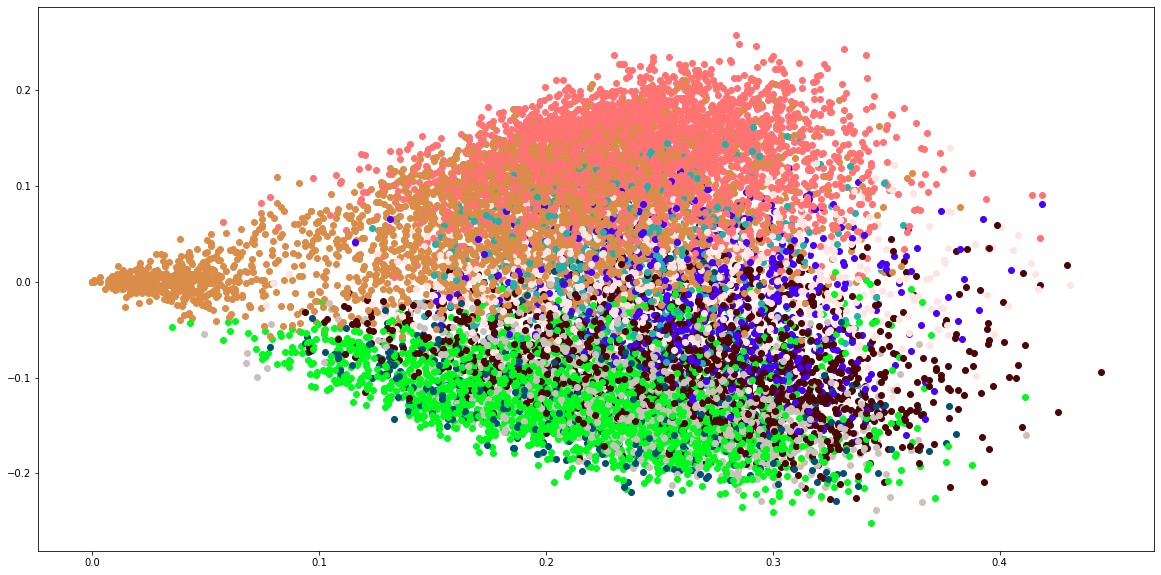

In [126]:
fig, ax = plt.subplots()
for index, instance in enumerate(reducedData):
#     print(instance, index, labels[index])
    comp1, comp2 = reducedData[index]
    color = labels_color_map[labels[index]]
    ax.scatter(comp1, comp2, c=color)
plt.show()

### t-distributed Stochastic Neighbor Embedding
t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In [25]:
from sklearn.manifold import TSNE

embeddings = TSNE(n_components=2)
plotY = embeddings.fit_transform(tfidf)

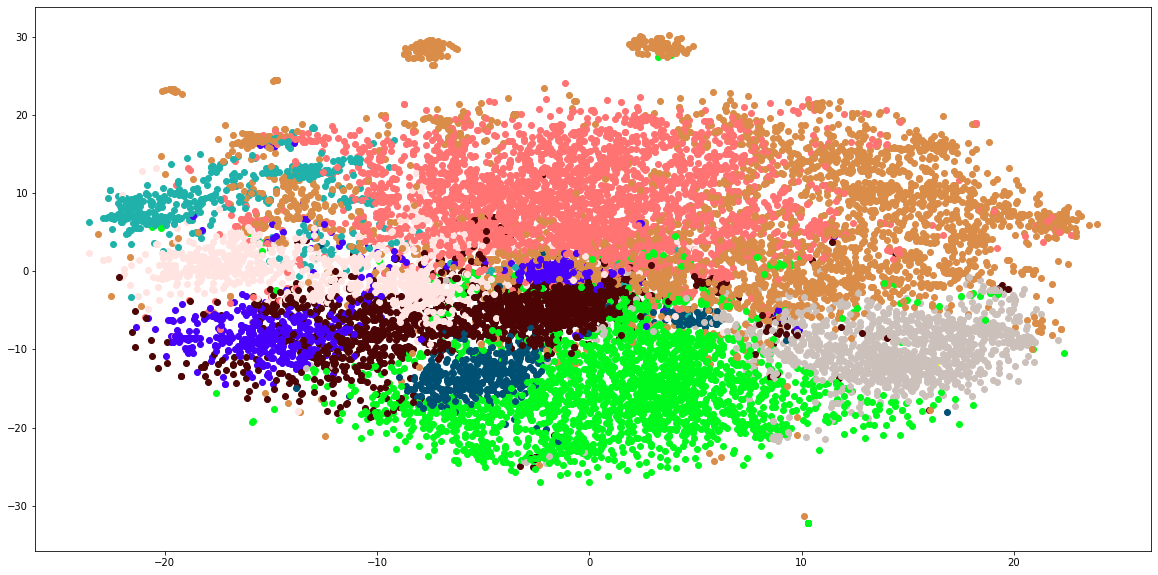

In [131]:
fig, ax = plt.subplots()
for index, instance in enumerate(plotY):
#     print(instance, index, labels[index])
    comp1, comp2 = plotY[index]
    color = labels_color_map[labels[index]]
    ax.scatter(comp1, comp2, c=color)
plt.show()

# Searching

In [87]:
stringToSearch=input("String to Search: ").lower()

String to Search: pakistan


In [84]:
def dictionarySearcher(data, stringToSearch):
    matchingDocuments={}
    
    for documentID in data:
        if stringToSearch in data[documentID]:
            matchingDocuments[documentID]=data[documentID]
    return matchingDocuments

In [88]:
matchingDocuments = dictionarySearcher(data, stringToSearch)
matchingDocumentsTitles={}
for documentID in matchingDocuments:
    file=open(os.path.join("..", "Data", "document_parses", "pdf_json", documentID + ".json"), "r")
    jsonFileData = json.load(file)
    file.close()
    matchingDocumentsTitles[documentID]=jsonFileData["metadata"]["title"]

print("The keyword \"" + stringToSearch + "\" appears in", str(len(matchingDocumentsTitles)), "Documents, and the titles are\n")
for i, documentID in enumerate(matchingDocumentsTitles):
    if matchingDocumentsTitles[documentID] == "":
        print(i, "<This Document has no Title>")
    else:
        print(i, matchingDocumentsTitles[documentID])

The keyword "pakistan" appears in 1 Documents, and the titles are

0 Felis margarita (Carnivora: Felidae)


In [89]:
documentToView=int(input("Which Document Do you want to view: "))

Which Document Do you want to view: 0


In [90]:
for i, documentID in enumerate(matchingDocumentsTitles):
    keywordsFile=open(os.path.join("..", "Outputs", "keywords.csv"), "r")
    keywordsDict={}
    for line in keywordsFile:
        row=line.rstrip("\n").split(",")
        paperID=row[0]
        paperTitle=row[1]
        keywords="".join(row[2:]).strip('"')
        keywordsDict[paperID]=keywords
    keywordsFile.close()
    
    if documentToView == i:
        if matchingDocumentsTitles[documentID] == "":
            print("<Unnamed Document>")
        else:
            print(">> Title:", matchingDocumentsTitles[documentID])
        file=open(os.path.join("..", "Data", "document_parses", "pdf_json", documentID + ".json"), "r")
        jsonFileData = json.load(file)
        file.close()
        
        abstract=jsonFileData["abstract"]
        bodyText=jsonFileData["body_text"]
        
        abstract = "".join([text["text"] + "\n" for text in abstract])
        bodyText = "".join([text["section"] + "\n" + text["text"] + "\n" for text in bodyText])
                
        if documentID in keywordsDict:
                print("Keywords that appear in the paper: ", keywordsDict[documentID])
                
        print("\n>> Abstract")
        print(abstract)
        print("\n>> Body")
        print(bodyText)

>> Title: Felis margarita (Carnivora: Felidae)

>> Abstract
Felis margarita Loche, 1858 is a felid commonly called the sand cat. It is 1 of 6 species in the genus Felis. One of the smallest of the wild cats, Felis margarita, is adapted behaviorally and morphologically to live in desert environments. Prey includes rodents, birds, reptiles, and arthropods. This species has a wide, but disjunct distribution through northern Africa, the Arabian Peninsula, and southwest and central Asia. F. margarita occurs at low densities throughout its range and is listed as "Near Threatened" by the International Union for Conservation of Nature and Natural Resources due to habitat degradation and its low and potentially declining population. F. margarita is bred in zoos in North America and Europe.


>> Body

F. m. harrisoni Hemmer, Grubb and Groves, 1976:301 . Type locality "northern edge of Umm as Samim, Oman, 21º 55' N, 55º 50' E." F. m. margarita Loche, 1858 :50. See above. F. m. scheffeli Hemmer, 1